<a href="https://colab.research.google.com/github/makedonkavasilevaa/Mental-Healty-in-Macedonian-Students/blob/main/Mentalnoto_zdravje_na_studentite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
%matplotlib inline

In [3]:
data_frame = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Менталното здравје на студентите во Македонија.csv')

# Исфрлање на несоодветни одговори според контролно прашање

In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 62 columns):
 #   Column                                                                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                                                                                               1400 non-null   object
 1   Јас сум моментално запишан/а на додипломски студии во Македонија.                                                                                                                       1400 non-null   object
 2   На кој унивезитет сте запишани?         

In [5]:
df = data_frame[~data_frame['Ве молиме селектирајте го само овошјето.'].isin(['Јаболко', 'Банана'])]

In [6]:
df.drop(columns=['Timestamp'], inplace=True)
df.drop(columns=['Ве молиме селектирајте го само овошјето.'], inplace=True)

<ipython-input-6-e52245a4eea6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Timestamp'], inplace=True)
<ipython-input-6-e52245a4eea6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Ве молиме селектирајте го само овошјето.'], inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1153 entries, 0 to 1399
Data columns (total 60 columns):
 #   Column                                                                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                                                                  --------------  ----- 
 0   Јас сум моментално запишан/а на додипломски студии во Македонија.                                                                                                                       1153 non-null   object
 1   На кој унивезитет сте запишани?                                                                                                                                                         1153 non-null   object
 2   Јас сум запишан/а на:                        

In [8]:
df.isna().sum()

Јас сум моментално запишан/а на додипломски студии во Македонија.                                                                                                                          0
На кој унивезитет сте запишани?                                                                                                                                                            0
Јас сум запишан/а на:                                                                                                                                                                      0
Колку години сте?                                                                                                                                                                          0
Кој е твојот биолошки пол? (пол назначен на раѓање)                                                                                                                                        0
Која е вашата тековна академска година на студирање? Ова е засновано на бројот на кредити кои ги имате завршено.                                                                           0
Која е вашата вистинска година на студирање, врз основа на бројот на календарски години кои сте ги поминале во постсредна институција?                                                     0
Која е вашата струка/ програма на која студирате                                                                                                                                           0
Дали сте редовен или вонреден студент?                                                                                                                                                     0
Дали ова ќе биде вашата прва додипломска диплома?                                                                                                                                          0
Дали Вие се индетификувате како студент со попреченост?                                                                                                                                    0
Кои се Вашите моментални услови на живеење?                                                                                                                                                0
Дали сте интернационален студент?                                                                                                                                                          0
Дали сте моментално вработени?                                                                                                                                                             0
Дали учествувате во хуманиратрна работа или студентски организации?                                                                                                                        0
Кои се Вашите планови после дипломирање?                                                                                                                                                   0
Колку часа неделно поминувате  на спортски настани како учесник?                                                                                                                           0
Колку часа неделно поминувате на одење на забави?                                                                                                                                          0
Колку часа неделно  поминувате на играње на видео игри, друштвени игри со пријатели?                                                                                                       0
Колку часа неделно поминувате на гледање онлајн рекретивни видеа како на Netflix или YouTube?                                                                                              0
Колку часа неделно поминувате на учество во студентски организации и истражување?                                                                                                          0
Колку часа неделно поминувате в

# Ја прикажуваме табелата

In [9]:
df.head(10)

Јас сум моментално запишан/а на додипломски студии во Македонија.  \
0                                                  Да                  
1                                                  Да                  
2                                                  Да                  
4                                                  Да                  
5                                                  Да                  
6                                                  Да                  
7                                                  Да                  
8                                                  Да                  
9                                                  Да                  
10                                                 Да                  

                   На кој унивезитет сте запишани? Јас сум запишан/а на:  \
0   Св. Кирил и Методиј Универзитет (УКИМ), Скопје     4+ годишни студии   
1   Св. Кирил и Методиј Универзитет (УКИМ), Скопје      4 годишни студии   
2   Св. Кирил и Методиј Универзитет (УКИМ), Скопје     4+ годишни студии   
4   Св. Кирил и Методиј Универзитет (УКИМ), Скопје      4 годишни студии   
5   Св. Кирил и Методиј Универзитет (УКИМ), Скопје     4+ годишни студии   
6   Св. Кирил и Методиј Универзитет (УКИМ), Скопје      4 годишни студии   
7   Св. Кирил и Методиј Универзитет (УКИМ), Скопје     4+ годишни студии   
8   Св. Кирил и Методиј Универзитет (УКИМ), Скопје      4 годишни студии   
9   Св. Кирил и Методиј Универзитет (УКИМ), Скопје     4+ годишни студии   
10  Св. Кирил и Методиј Универзитет (УКИМ), Скопје     4+ годишни студии   

   Колку години сте? Кој е твојот биолошки пол? (пол назначен на раѓање)  \
0              18-24                                             Женско    
1              18-24                                             Женско    
2              18-24                                             Женско    
4              18-24                                             Женско    
5              18-24                                             Женско    
6              18-24                                             Женско    
7              18-24                                             Женско    
8              18-24                                              Машко    
9              18-24                                              Машко    
10             18-24                                             Женско    

   Која е вашата тековна академска година на студирање? Ова е засновано на бројот на кредити кои ги имате завршено.     \
0                                            3 Година                                                                    
1                                            4 Година                                                                    
2                                            3 Година                                                                    
4                                            4 Година                                                                    
5                                            3 Година                                                                    
6                                            4 Година                                                                    
7                                            2 Година                                                                    
8                                            3 Година                                                                    
9                                            4 Година                                                                    
10                                           4 Година                                                                    

   Која е вашата вистинска година на студирање, врз основа на бројот на календарски години кои сте ги поминале во постсредна институција?     \
0                                            3 Го

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1153 entries, 0 to 1399
Data columns (total 60 columns):
 #   Column                                                                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                                                                  --------------  ----- 
 0   Јас сум моментално запишан/а на додипломски студии во Македонија.                                                                                                                       1153 non-null   object
 1   На кој унивезитет сте запишани?                                                                                                                                                         1153 non-null   object
 2   Јас сум запишан/а на:                        


# Генерална анализа на податоците

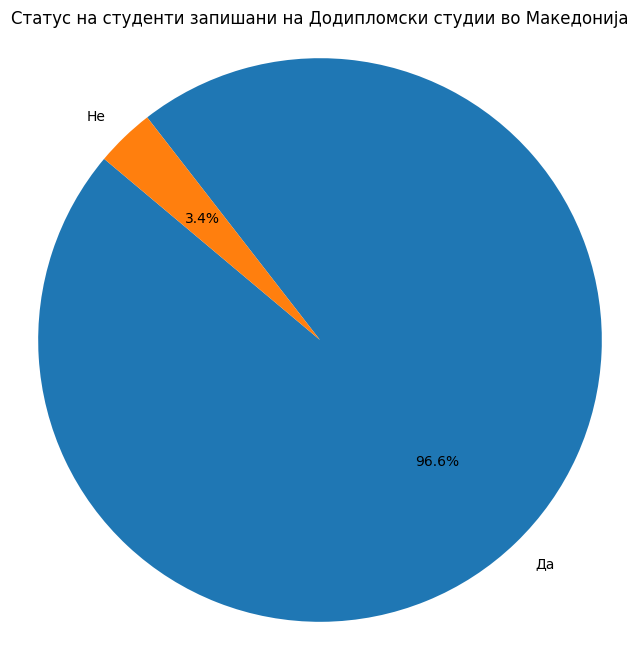

In [11]:
counts = df['Јас сум моментално запишан/а на додипломски студии во Македонија.'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Статус на студенти запишани на Додипломски студии во Македонија')
plt.axis('equal')
plt.show()

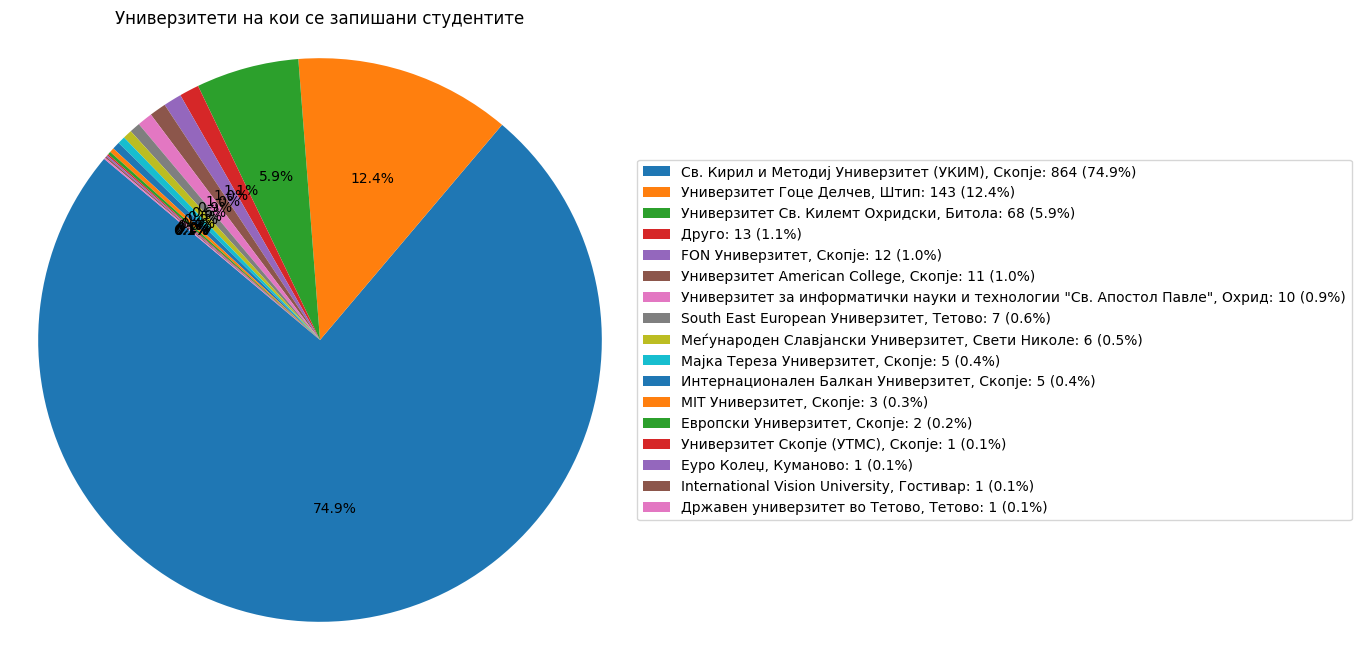

In [12]:
counts = df['На кој унивезитет сте запишани?'].value_counts()
plt.figure(figsize=(8, 8))

patches, texts, autotexts = plt.pie(counts, labels=None, autopct='%1.1f%%', startangle=140)
labels = [f'{label}: {count} ({percentage:.1f}%)' for label, count, percentage in zip(counts.index, counts.values, counts.values / counts.sum() * 100)]
plt.legend(handles=patches, labels=labels, bbox_to_anchor=(1, 0.5), loc='center left')

plt.title('Универзитети на кои се запишани студентите')
plt.axis('equal')
plt.show()

<ipython-input-13-7cf9e10cd9c3>:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


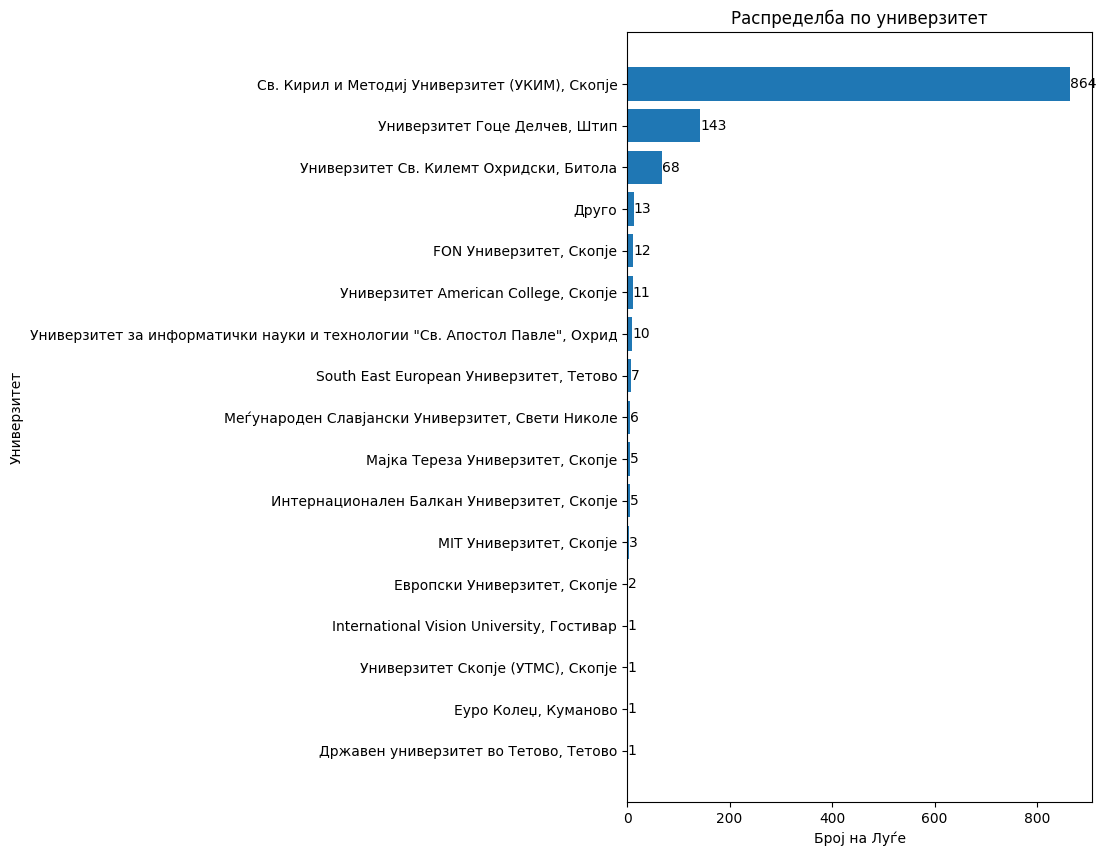

In [13]:
branch = df['На кој унивезитет сте запишани?'].value_counts().sort_values()

plt.figure(figsize=(6, 10))

bars = plt.barh(branch.index.astype(str), branch.values)

plt.ylabel('Универзитет')
plt.xlabel('Број на Луѓе')
plt.title('Распределба по универзитет')

for bar, label in zip(bars, branch.values):
    xval = bar.get_width()
    plt.text(xval + 0.1, bar.get_y() + bar.get_height()/2, int(xval), ha='left', va='center')

plt.tight_layout()

plt.show()


In [14]:
counts = df['На кој унивезитет сте запишани?'].value_counts()

mean_value_counts = counts.mean()
print(f"Средна вредност на податоците по универзитет е: {mean_value_counts}")

median_value_counts = counts.median()
print(f"Медијана на податоците по универзитет е: {median_value_counts}")

mode_value_counts = counts.mode()
print(f"Мод на податоците по универзитет е: {mode_value_counts.values}")

Средна вредност на податоците по универзитет е: 67.82352941176471
Медијана на податоците по универзитет е: 6.0
Мод на податоците по универзитет е: [1]


In [15]:
gender_counts = df.groupby('На кој унивезитет сте запишани?')['Кој е твојот биолошки пол? (пол назначен на раѓање)'].value_counts()
print(gender_counts.value_counts)

<bound method IndexOpsMixin.value_counts of На кој унивезитет сте запишани?                                            Кој е твојот биолошки пол? (пол назначен на раѓање)
FON Универзитет, Скопје                                                    Женско                                                  10
                                                                           Машко                                                    2
International Vision University, Гостивар                                  Женско                                                   1
MIT Универзитет, Скопје                                                    Женско                                                   2
                                                                           Интерсекс                                                1
South East European Универзитет, Тетово                                    Женско                                                   5
                         

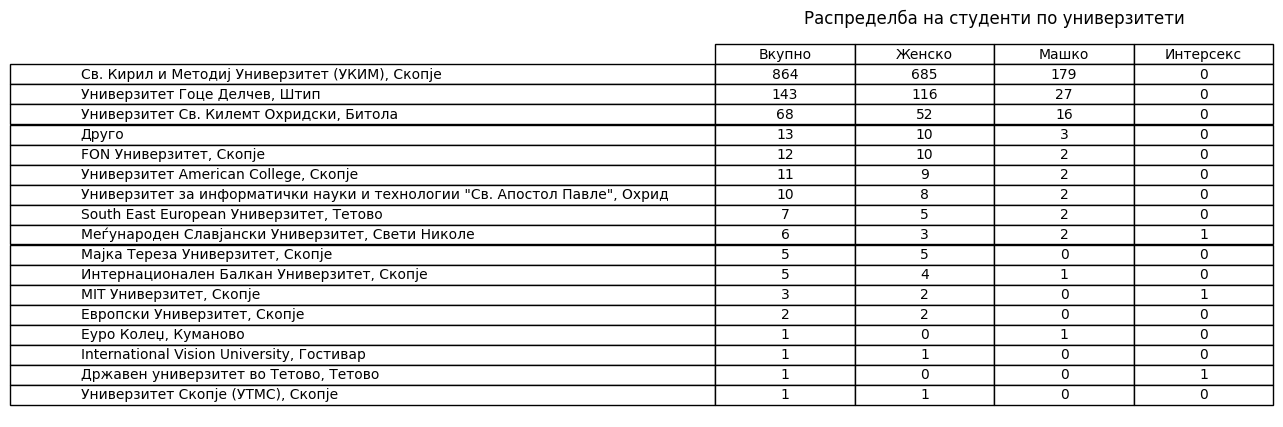

In [16]:
total_counts = df['На кој унивезитет сте запишани?'].value_counts().sort_values()

gender_counts = df.groupby('На кој унивезитет сте запишани?')['Кој е твојот биолошки пол? (пол назначен на раѓање)'].value_counts().unstack().fillna(0)

gender_counts = gender_counts.reindex(columns=['Женско', 'Машко', 'Интерсекс'], fill_value=0)

gender_counts['Вкупно'] = gender_counts.sum(axis=1)

gender_counts = gender_counts[['Вкупно', 'Женско', 'Машко', 'Интерсекс']]

gender_counts = gender_counts.astype(int)

gender_counts_sorted = gender_counts.sort_values(by='Вкупно', ascending=False)

plt.figure(figsize=(6, 5))

table = plt.table(cellText=gender_counts_sorted.values,
                  colLabels=gender_counts_sorted.columns,
                  rowLabels=gender_counts_sorted.index,
                  cellLoc='center',
                  loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.axis('off')

plt.title('Распределба на студенти по универзитети')

plt.show()

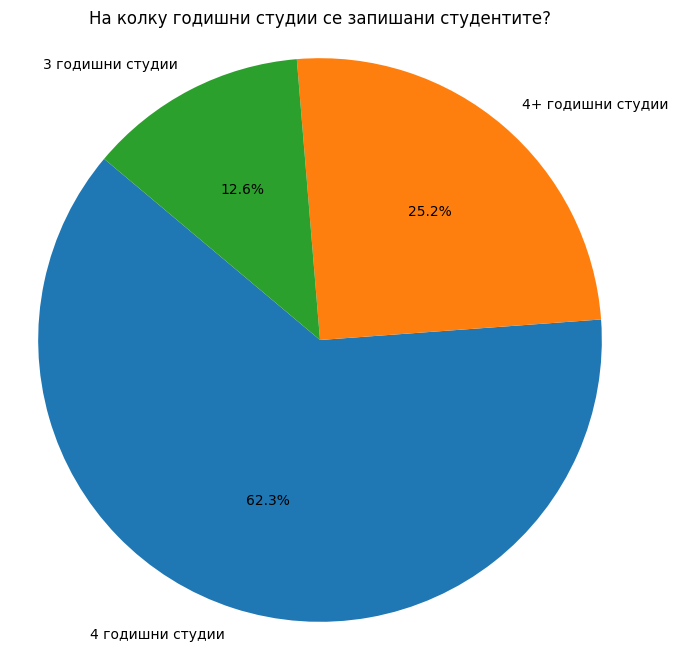

In [17]:
counts = df['Јас сум запишан/а на:'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('На колку годишни студии се запишани студентите?')
plt.axis('equal')
plt.show()

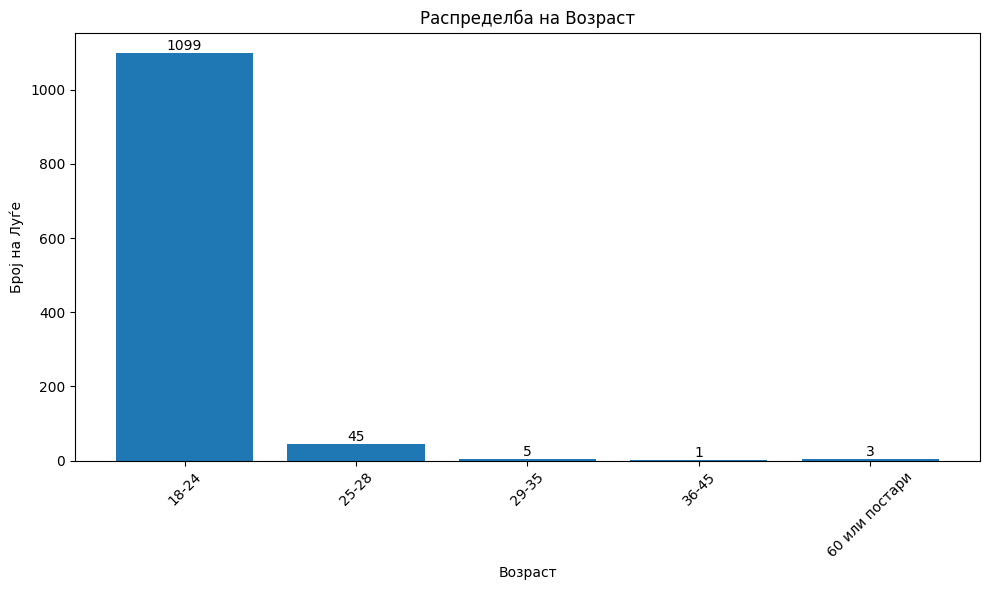

In [18]:
age_counts = df['Колку години сте?'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(age_counts.index.astype(str), age_counts.values)

plt.xlabel('Возраст')
plt.ylabel('Број на Луѓе')
plt.title('Распределба на Возраст')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

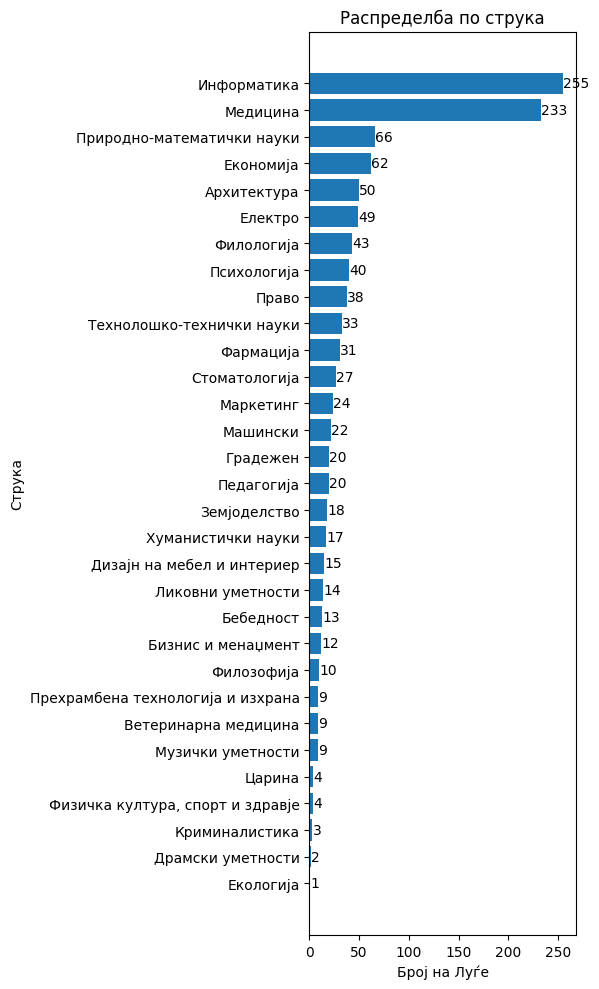

In [19]:
branch = df['Која е вашата струка/ програма на која студирате'].value_counts().sort_values()

plt.figure(figsize=(6, 10))

bars = plt.barh(branch.index.astype(str), branch.values)

plt.ylabel('Струка')
plt.xlabel('Број на Луѓе')
plt.title('Распределба по струка')

for bar, label in zip(bars, branch.values):
    xval = bar.get_width()
    plt.text(xval + 0.1, bar.get_y() + bar.get_height()/2, int(xval), ha='left', va='center')

plt.tight_layout()

plt.show()


In [20]:
counts = df['Која е вашата струка/ програма на која студирате'].value_counts()

mean_value_counts = counts.mean()
print(f"Средна вредност на податоците по струка е: {mean_value_counts}")

median_value_counts = counts.median()
print(f"Медијан на податоците по струка е: {median_value_counts}")

mode_value_counts = counts.mode()
print(f"Мод на податоците по струка е: {mode_value_counts.values}")

Средна вредност на податоците по струка е: 37.193548387096776
Медијан на податоците по струка е: 20.0
Мод на податоците по струка е: [9]


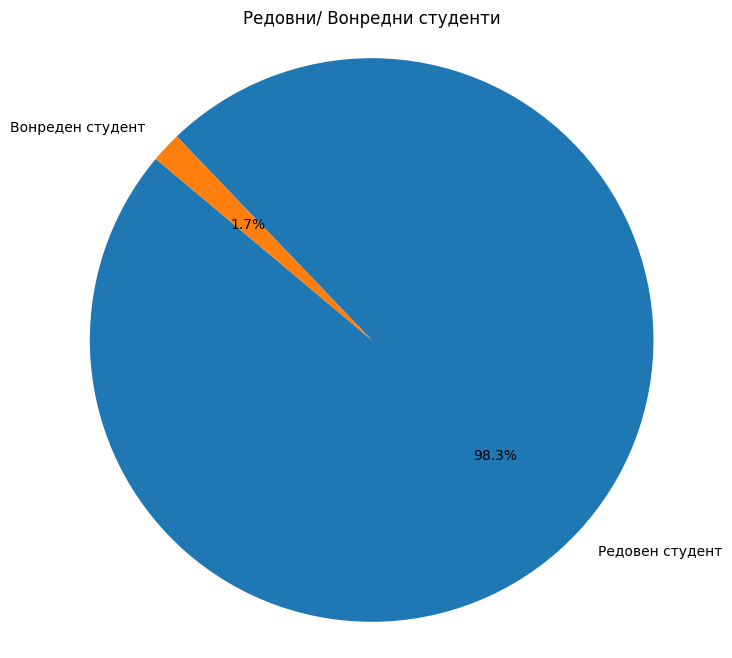

In [21]:
counts = df['Дали сте редовен или вонреден студент?'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Редовни/ Вонредни студенти')
plt.axis('equal')
plt.show()

# Обработка на податоците

In [22]:
value_counts = df['На кој унивезитет сте запишани?'].value_counts()

universities_to_keep = value_counts[value_counts > 6].index

df = df[df['На кој унивезитет сте запишани?'].isin(universities_to_keep)]

print(universities_to_keep)
df.head(10)

Index(['Св. Кирил и Методиј Универзитет (УКИМ), Скопје',
       'Универзитет Гоце Делчев, Штип',
       'Универзитет Св. Килемт Охридски, Битола', 'Друго',
       'FON Универзитет, Скопје', 'Универзитет American College, Скопје',
       'Универзитет за информатички науки и технологии "Св. Апостол Павле", Охрид',
       'South East European Универзитет, Тетово'],
      dtype='object', name='На кој унивезитет сте запишани?')


Јас сум моментално запишан/а на додипломски студии во Македонија.  \
0                                                  Да                  
1                                                  Да                  
2                                                  Да                  
4                                                  Да                  
5                                                  Да                  
6                                                  Да                  
7                                                  Да                  
8                                                  Да                  
9                                                  Да                  
10                                                 Да                  

                   На кој унивезитет сте запишани? Јас сум запишан/а на:  \
0   Св. Кирил и Методиј Универзитет (УКИМ), Скопје     4+ годишни студии   
1   Св. Кирил и Методиј Универзитет (УКИМ), Скопје      4 годишни студии   
2   Св. Кирил и Методиј Универзитет (УКИМ), Скопје     4+ годишни студии   
4   Св. Кирил и Методиј Универзитет (УКИМ), Скопје      4 годишни студии   
5   Св. Кирил и Методиј Универзитет (УКИМ), Скопје     4+ годишни студии   
6   Св. Кирил и Методиј Универзитет (УКИМ), Скопје      4 годишни студии   
7   Св. Кирил и Методиј Универзитет (УКИМ), Скопје     4+ годишни студии   
8   Св. Кирил и Методиј Универзитет (УКИМ), Скопје      4 годишни студии   
9   Св. Кирил и Методиј Универзитет (УКИМ), Скопје     4+ годишни студии   
10  Св. Кирил и Методиј Универзитет (УКИМ), Скопје     4+ годишни студии   

   Колку години сте? Кој е твојот биолошки пол? (пол назначен на раѓање)  \
0              18-24                                             Женско    
1              18-24                                             Женско    
2              18-24                                             Женско    
4              18-24                                             Женско    
5              18-24                                             Женско    
6              18-24                                             Женско    
7              18-24                                             Женско    
8              18-24                                              Машко    
9              18-24                                              Машко    
10             18-24                                             Женско    

   Која е вашата тековна академска година на студирање? Ова е засновано на бројот на кредити кои ги имате завршено.     \
0                                            3 Година                                                                    
1                                            4 Година                                                                    
2                                            3 Година                                                                    
4                                            4 Година                                                                    
5                                            3 Година                                                                    
6                                            4 Година                                                                    
7                                            2 Година                                                                    
8                                            3 Година                                                                    
9                                            4 Година                                                                    
10                                           4 Година                                                                    

   Која е вашата вистинска година на студирање, врз основа на бројот на календарски години кои сте ги поминале во постсредна институција?     \
0                                            3 Го

In [23]:
value_counts = df['Која е вашата струка/ програма на која студирате'].value_counts()

programs_to_keep = value_counts[value_counts > 20].index

df = df[df['Која е вашата струка/ програма на која студирате'].isin(programs_to_keep)]

df.head(10)

Јас сум моментално запишан/а на додипломски студии во Македонија.  \
0                                                  Да                  
1                                                  Да                  
2                                                  Да                  
4                                                  Да                  
5                                                  Да                  
6                                                  Да                  
7                                                  Да                  
8                                                  Да                  
9                                                  Да                  
10                                                 Да                  

                   На кој унивезитет сте запишани? Јас сум запишан/а на:  \
0   Св. Кирил и Методиј Универзитет (УКИМ), Скопје     4+ годишни студии   
1   Св. Кирил и Методиј Универзитет (УКИМ), Скопје      4 годишни студии   
2   Св. Кирил и Методиј Универзитет (УКИМ), Скопје     4+ годишни студии   
4   Св. Кирил и Методиј Универзитет (УКИМ), Скопје      4 годишни студии   
5   Св. Кирил и Методиј Универзитет (УКИМ), Скопје     4+ годишни студии   
6   Св. Кирил и Методиј Универзитет (УКИМ), Скопје      4 годишни студии   
7   Св. Кирил и Методиј Универзитет (УКИМ), Скопје     4+ годишни студии   
8   Св. Кирил и Методиј Универзитет (УКИМ), Скопје      4 годишни студии   
9   Св. Кирил и Методиј Универзитет (УКИМ), Скопје     4+ годишни студии   
10  Св. Кирил и Методиј Универзитет (УКИМ), Скопје     4+ годишни студии   

   Колку години сте? Кој е твојот биолошки пол? (пол назначен на раѓање)  \
0              18-24                                             Женско    
1              18-24                                             Женско    
2              18-24                                             Женско    
4              18-24                                             Женско    
5              18-24                                             Женско    
6              18-24                                             Женско    
7              18-24                                             Женско    
8              18-24                                              Машко    
9              18-24                                              Машко    
10             18-24                                             Женско    

   Која е вашата тековна академска година на студирање? Ова е засновано на бројот на кредити кои ги имате завршено.     \
0                                            3 Година                                                                    
1                                            4 Година                                                                    
2                                            3 Година                                                                    
4                                            4 Година                                                                    
5                                            3 Година                                                                    
6                                            4 Година                                                                    
7                                            2 Година                                                                    
8                                            3 Година                                                                    
9                                            4 Година                                                                    
10                                           4 Година                                                                    

   Која е вашата вистинска година на студирање, врз основа на бројот на календарски години кои сте ги поминале во постсредна институција?     \
0                                            3 Го

In [24]:
df_notEncode = df.copy(deep=True)
df_notEncode.head()

Јас сум моментално запишан/а на додипломски студии во Македонија.  \
0                                                 Да                  
1                                                 Да                  
2                                                 Да                  
4                                                 Да                  
5                                                 Да                  

                  На кој унивезитет сте запишани? Јас сум запишан/а на:  \
0  Св. Кирил и Методиј Универзитет (УКИМ), Скопје     4+ годишни студии   
1  Св. Кирил и Методиј Универзитет (УКИМ), Скопје      4 годишни студии   
2  Св. Кирил и Методиј Универзитет (УКИМ), Скопје     4+ годишни студии   
4  Св. Кирил и Методиј Универзитет (УКИМ), Скопје      4 годишни студии   
5  Св. Кирил и Методиј Универзитет (УКИМ), Скопје     4+ годишни студии   

  Колку години сте? Кој е твојот биолошки пол? (пол назначен на раѓање)  \
0             18-24                                             Женско    
1             18-24                                             Женско    
2             18-24                                             Женско    
4             18-24                                             Женско    
5             18-24                                             Женско    

  Која е вашата тековна академска година на студирање? Ова е засновано на бројот на кредити кои ги имате завршено.     \
0                                           3 Година                                                                    
1                                           4 Година                                                                    
2                                           3 Година                                                                    
4                                           4 Година                                                                    
5                                           3 Година                                                                    

  Која е вашата вистинска година на студирање, врз основа на бројот на календарски години кои сте ги поминале во постсредна институција?     \
0                                           3 Година                                                                                          
1                                           4 Година                                                                                          
2                                           3 Година                                                                                          
4                                           4 Година                                                                                          
5                                           3 Година                                                                                          

  Која е вашата струка/ програма на која студирате  \
0                                         Медицина   
1                                      Информатика   
2                                         Медицина   
4                                      Информатика   
5                                         Медицина   

  Дали сте редовен или вонреден студент?  \
0                        Редовен студент   
1                        Редовен студент   
2                        Редовен студент   
4                        Редовен студент   
5                        Редовен студент   

  Дали ова ќе биде вашата прва додипломска диплома?  ...  \
0                                               Да.  ...   
1                                               Да.  ...   
2                                               Да.  ...   
4                                               Да.  ...   
5                                               Да.  ...   

  Обично знам да претерам со реакција во одредени ситуации  \
0                                                  4         
1           

# Енкодирање на сите вредности во табелата кои не се нумерички

In [25]:
classes = list(set(df['Јас сум моментално запишан/а на додипломски студии во Македонија.']))
classes

['Да', 'Не']

In [26]:
diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
diction

{'Да': 0, 'Не': 1}

In [27]:
df['Јас сум моментално запишан/а на додипломски студии во Македонија.'] = [
    diction[val] if val in diction else 'Unknown' for val in df['Јас сум моментално запишан/а на додипломски студии во Македонија.']
]

<ipython-input-27-7ce52a9fa338>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Јас сум моментално запишан/а на додипломски студии во Македонија.'] = [


In [28]:
df['Јас сум моментално запишан/а на додипломски студии во Македонија.']

0       0
1       0
2       0
4       0
5       0
       ..
1392    0
1394    0
1395    0
1397    0
1399    0
Name: Јас сум моментално запишан/а на додипломски студии во Македонија., Length: 956, dtype: int64

In [29]:
classes = list(set(df['На кој унивезитет сте запишани?']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['На кој унивезитет сте запишани?'] = [
    diction[val] for val in df['На кој унивезитет сте запишани?']
]

{'Универзитет Св. Килемт Охридски, Битола': 0, 'Универзитет за информатички науки и технологии "Св. Апостол Павле", Охрид': 1, 'FON Универзитет, Скопје': 2, 'Универзитет Гоце Делчев, Штип': 3, 'South East European Универзитет, Тетово': 4, 'Универзитет American College, Скопје': 5, 'Друго': 6, 'Св. Кирил и Методиј Универзитет (УКИМ), Скопје': 7}


In [30]:
classes = list(set(df['Јас сум запишан/а на:']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Јас сум запишан/а на:'] = [
    diction[val] for val in df['Јас сум запишан/а на:']
]

{'4 годишни студии': 0, '4+ годишни студии': 1, '3 годишни студии': 2}


In [31]:
classes = list(set(df['Колку години сте?']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Колку години сте?'] = [
    diction[val] for val in df['Колку години сте?']
]

{'36-45': 0, '29-35': 1, '18-24': 2, '25-28': 3}


In [32]:
classes = list(set(df['Кој е твојот биолошки пол? (пол назначен на раѓање)']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Кој е твојот биолошки пол? (пол назначен на раѓање)'] = [
    diction[val] for val in df['Кој е твојот биолошки пол? (пол назначен на раѓање)']
]

{'Машко': 0, 'Женско': 1}


In [33]:
classes = list(set(df['Која е вашата тековна академска година на студирање? Ова е засновано на бројот на кредити кои ги имате завршено.   ']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Која е вашата тековна академска година на студирање? Ова е засновано на бројот на кредити кои ги имате завршено.   '] = [
    diction[val] for val in df['Која е вашата тековна академска година на студирање? Ова е засновано на бројот на кредити кои ги имате завршено.   ']
]

{'1 Година': 0, '4 Година': 1, '3 Година': 2, 'Пост 4та година': 3, '2 Година': 4}


In [34]:
classes = list(set(df['Која е вашата вистинска година на студирање, врз основа на бројот на календарски години кои сте ги поминале во постсредна институција?   ']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Која е вашата вистинска година на студирање, врз основа на бројот на календарски години кои сте ги поминале во постсредна институција?   '] = [
    diction[val] for val in df['Која е вашата вистинска година на студирање, врз основа на бројот на календарски години кои сте ги поминале во постсредна институција?   ']
]

{'6 Година': 0, '5 Година': 1, '1 Година': 2, '4 Година': 3, '3 Година': 4, '8+ Година': 5, '2 Година': 6, '7 Година': 7}


In [35]:
classes = list(set(df['Која е вашата струка/ програма на која студирате']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Која е вашата струка/ програма на која студирате'] = [
    diction[val] for val in df['Која е вашата струка/ програма на која студирате']
]

{'Природно-математички науки': 0, 'Машински': 1, 'Архитектура': 2, 'Филологија': 3, 'Маркетинг': 4, 'Економија': 5, 'Медицина': 6, 'Право': 7, 'Информатика': 8, 'Стоматологија': 9, 'Технолошко-технички науки': 10, 'Електро': 11, 'Психологија': 12, 'Фармација': 13}


In [36]:
classes = list(set(df['Дали сте редовен или вонреден студент?']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Дали сте редовен или вонреден студент?'] = [
    diction[val] for val in df['Дали сте редовен или вонреден студент?']
]

{'Редовен студент': 0, 'Вонреден студент': 1}


In [37]:
classes = list(set(df['Дали ова ќе биде вашата прва додипломска диплома?']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Дали ова ќе биде вашата прва додипломска диплома?'] = [
    diction[val] for val in df['Дали ова ќе биде вашата прва додипломска диплома?']
]

{'Не, предходно се имам стекнато со уште една диплома.': 0, 'Не, предходно се имам стекнато со уште две дипломи.': 1, 'Да.': 2}


In [38]:
classes = list(set(df['Дали Вие се индетификувате како студент со попреченост?']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Дали Вие се индетификувате како студент со попреченост?'] = [
    diction[val] for val in df['Дали Вие се индетификувате како студент со попреченост?']
]

{'Да': 0, 'Не': 1, 'Преферирам да не одговорам.': 2}


In [39]:
classes = list(set(df['Кои се Вашите моментални услови на живеење?']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Кои се Вашите моментални услови на живеење?'] = [
    diction[val] for val in df['Кои се Вашите моментални услови на живеење?']
]

{'Самостојно со пријатели/ цимери': 0, 'Со фамилијата': 1, 'Студентски дом/ Интернат': 2, 'Целосно самостојно': 3}


In [40]:
classes = list(set(df['Дали сте интернационален студент?']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Дали сте интернационален студент?'] = [
    diction[val] for val in df['Дали сте интернационален студент?']
]

{'Да': 0, 'Не': 1}


In [41]:
classes = list(set(df['Дали сте моментално вработени?']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Дали сте моментално вработени?'] = [
    diction[val] for val in df['Дали сте моментално вработени?']
]

{'Не.': 0, 'Да, со пола работно време.': 1, 'Да, со полно работно време.': 2}


In [42]:
classes = list(set(df['Дали учествувате во хуманиратрна работа или студентски организации?']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Дали учествувате во хуманиратрна работа или студентски организации?'] = [
    diction[val] for val in df['Дали учествувате во хуманиратрна работа или студентски организации?']
]

{'Да, повеќе од 15 часа неделно.': 0, 'Да, помеѓу 11-15 часа неделно.': 1, 'Да, помеѓу 1-5 часа неделно.': 2, 'Да, помеѓу 6-10 часа неделно.': 3, 'Не': 4}


In [43]:
classes = list(set(df['Кои се Вашите планови после дипломирање?']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Кои се Вашите планови после дипломирање?'] = [
    diction[val] for val in df['Кои се Вашите планови после дипломирање?']
]

{'Неодлучено': 0, 'Да започнам со занаетчиска работа.': 1, 'Започнување кариера/ вработување': 2, 'Да продолжам со студирање, Магистарска/ Докторска ппрограма': 3, 'Не планирам вработување или понатомошна едукација': 4}


In [44]:
classes = list(set(df['Колку часа неделно поминувате  на спортски настани како учесник?']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Колку часа неделно поминувате  на спортски настани како учесник?'] = [
    diction[val] for val in df['Колку часа неделно поминувате  на спортски настани како учесник?']
]

{'16-20 часа': 0, '1-2 часа': 1, 'Повеќе од 20 часа': 2, '6-10 часа': 3, '3-5 часа': 4, '11-15 часа': 5, 'Помалку од 1 час': 6}


In [45]:
classes = list(set(df['Колку часа неделно поминувате на одење на забави?']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Колку часа неделно поминувате на одење на забави?'] = [
    diction[val] for val in df['Колку часа неделно поминувате на одење на забави?']
]

{'1-2 часа': 0, 'Повеќе од 20 часа': 1, '6-10 часа': 2, '3-5 часа': 3, '11-15 часа': 4, 'Помалку од 1 час': 5}


In [46]:
classes = list(set(df['Колку часа неделно  поминувате на играње на видео игри, друштвени игри со пријатели?']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Колку часа неделно  поминувате на играње на видео игри, друштвени игри со пријатели?'] = [
    diction[val] for val in df['Колку часа неделно  поминувате на играње на видео игри, друштвени игри со пријатели?']
]

{'16-20 часа': 0, '1-2 часа': 1, 'Повеќе од 20 часа': 2, '6-10 часа': 3, '3-5 часа': 4, '11-15 часа': 5, 'Помалку од 1 час': 6}


In [47]:
classes = list(set(df['Колку часа неделно поминувате на гледање онлајн рекретивни видеа како на Netflix или YouTube?']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Колку часа неделно поминувате на гледање онлајн рекретивни видеа како на Netflix или YouTube?'] = [
    diction[val] for val in df['Колку часа неделно поминувате на гледање онлајн рекретивни видеа како на Netflix или YouTube?']
]

{'16-20 часа': 0, '1-2 часа': 1, 'Повеќе од 20 часа': 2, '6-10 часа': 3, '3-5 часа': 4, '11-15 часа': 5, 'Помалку од 1 час': 6}


In [48]:
classes = list(set(df['Колку часа неделно поминувате на учество во студентски организации и истражување?']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Колку часа неделно поминувате на учество во студентски организации и истражување?'] = [
    diction[val] for val in df['Колку часа неделно поминувате на учество во студентски организации и истражување?']
]

{'16-20 часа': 0, '1-2 часа': 1, 'Повеќе од 20 часа': 2, '6-10 часа': 3, '3-5 часа': 4, '11-15 часа': 5, 'Помалку од 1 час': 6}


In [49]:
classes = list(set(df['Колку часа неделно поминувате во учење?']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Колку часа неделно поминувате во учење?'] = [
    diction[val] for val in df['Колку часа неделно поминувате во учење?']
]

{'16-20 часа': 0, '1-2 часа': 1, 'Повеќе од 20 часа': 2, '6-10 часа': 3, '3-5 часа': 4, '11-15 часа': 5, 'Помалку од 1 час': 6}


In [50]:
classes = list(set(df['Колку часа неделно поминувате во користење студентски акомодации како библиотека, читална, онлајн алатки  ?']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Колку часа неделно поминувате во користење студентски акомодации како библиотека, читална, онлајн алатки  ?'] = [
    diction[val] for val in df['Колку часа неделно поминувате во користење студентски акомодации како библиотека, читална, онлајн алатки  ?']
]

{'16-20 часа': 0, '1-2 часа': 1, 'Повеќе од 20 часа': 2, '6-10 часа': 3, '3-5 часа': 4, '11-15 часа': 5, 'Помалку од 1 час': 6}


In [51]:
classes = list(set(df['Кога вежбате, дали се занимавате првенствено со аеробни или анаеробни вежби?']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Кога вежбате, дали се занимавате првенствено со аеробни или анаеробни вежби?'] = [
    diction[val] for val in df['Кога вежбате, дали се занимавате првенствено со аеробни или анаеробни вежби?']
]

{'Анаеробна вежба - вежба која бара максимален физички напор кој може да се одржи само за кратки временски периоди (на пр, спринтање, кревање тежина)': 0, 'Аеробна вежба - вежба каде што го движите вашето тело подолго време на одржлив начин (на пр, трчање, пешачење, велосипедизам, пливање во лента).': 1, 'И двете': 2}


In [52]:
classes = list(set(df['Колку часа спиете во просечна ноќ?']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Колку часа спиете во просечна ноќ?'] = [
    diction[val] for val in df['Колку часа спиете во просечна ноќ?']
]

{'10 часа': 0, '11 часа': 1, '9 часа': 2, '7 часа': 3, '8 часа': 4, '5 часа': 5, '6 часа': 6, '12 часа или повеќе': 7, 'помалку од 4 часа': 8}


In [53]:
classes = list(set(df['Дали се чувствувате добро одморени кога се будите?']))

diction = {}
for i in range(0,len(classes)):
    diction[classes[i]] = i
print(diction)

df['Дали се чувствувате добро одморени кога се будите?'] = [
    diction[val] for val in df['Дали се чувствувате добро одморени кога се будите?']
]

{'Да': 0, 'Некогаш': 1, 'Не': 2}


In [54]:
df

Јас сум моментално запишан/а на додипломски студии во Македонија.  \
0                                                     0                   
1                                                     0                   
2                                                     0                   
4                                                     0                   
5                                                     0                   
...                                                 ...                   
1392                                                  0                   
1394                                                  0                   
1395                                                  0                   
1397                                                  0                   
1399                                                  0                   

      На кој унивезитет сте запишани?  Јас сум запишан/а на:  \
0                                   7                      1   
1                                   7                      0   
2                                   7                      1   
4                                   7                      0   
5                                   7                      1   
...                               ...                    ...   
1392                                6                      2   
1394                                7                      0   
1395                                7                      0   
1397                                7                      0   
1399                                7                      0   

      Колку години сте?  Кој е твојот биолошки пол? (пол назначен на раѓање)  \
0                     2                                                  1     
1                     2                                                  1     
2                     2                                                  1     
4                     2                                                  1     
5                     2                                                  1     
...                 ...                                                ...     
1392                  2                                                  1     
1394                  2                                                  1     
1395                  2                                                  1     
1397                  2                                                  1     
1399                  2                                                  0     

      Која е вашата тековна академска година на студирање? Ова е засновано на бројот на кредити кои ги имате завршено.     \
0                                                     2                                                                     
1                                                     1                                                                     
2                                                     2                                                                     
4                                                     1                                                                     
5                                                     2                                                                     
...                                                 ...                                                                     
1392                                                  0                                                                     
1394                                                  2                                                                     
1395                                                  4                                                                     
1397                                                  0                                                                     


In [55]:
df.columns = [f'Q{i+1}' for i in range(len(df.columns))]

In [56]:
df

Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  ...  Q51  Q52  Q53  Q54  Q55  \
0      0   7   1   2   1   2   4   6   0    2  ...    4    4    4    2    3   
1      0   7   0   2   1   1   3   8   0    2  ...    4    3    5    3    1   
2      0   7   1   2   1   2   4   6   0    2  ...    5    5    5    5    5   
4      0   7   0   2   1   1   3   8   0    2  ...    5    5    5    4    5   
5      0   7   1   2   1   2   4   6   0    2  ...    5    4    5    5    4   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   
1392   0   6   2   2   1   0   6   8   0    2  ...    3    5    5    5    3   
1394   0   7   0   2   1   2   4   3   0    2  ...    3    2    4    1    3   
1395   0   7   0   2   1   4   6   3   0    2  ...    5    4    5    2    3   
1397   0   7   0   2   1   0   2  11   0    2  ...    5    5    5    5    5   
1399   0   7   0   2   0   2   4   8   0    2  ...    4    3    2    1    5   

      Q56  Q57  Q58  Q59                 Q60  
0       3    4    3    3                  Не  
1       4    2    3    3                  Не  
2       4    5    5    5                  Не  
4       3    3    5    3  ADHD, анксиозност   
5       2    4    5    3                  Не  
...   ...  ...  ...  ...                 ...  
1392    4    4    5    5                  Не  
1394    1    1    1    1                  Не  
1395    3    1    1    1                  Не  
1397    5    5    5    5        Да,депресија  
1399    1    1    1    2                  Не  

[956 rows x 60 columns]

# Менталното здравје на студентите

1. По универзитет

In [57]:
selected_columns = df.loc[:, 'Q46':'Q59']

result_df = pd.DataFrame()

for column in selected_columns.columns:
    counts = selected_columns[column].value_counts(normalize=True) * 100

    counts = counts.reindex(range(1, 6), fill_value=0)

    formatted_counts = counts.apply(lambda x: f"{x:.2f}%")

    result_df[column] = formatted_counts

result_df = result_df.T

result_df.columns = ['1', '2', '3', '4', '5']

print(result_df)

          1       2       3       4       5
Q46   8.89%  10.77%  22.38%  29.39%  28.56%
Q47  10.88%  13.91%  25.21%  22.38%  27.62%
Q48  21.34%  17.68%  24.90%  19.87%  16.21%
Q49  27.72%  17.47%  17.89%  19.77%  17.15%
Q50   7.74%  10.36%  18.20%  24.27%  39.44%
Q51   8.47%  15.59%  26.57%  20.71%  28.66%
Q52  10.98%  17.89%  22.70%  19.87%  28.56%
Q53  11.51%  11.40%  17.68%  21.76%  37.66%
Q54  27.41%  17.68%  19.56%  15.27%  20.08%
Q55  16.53%  19.25%  30.44%  17.68%  16.11%
Q56  23.74%  22.49%  28.35%  14.12%  11.30%
Q57  38.28%  14.64%  16.32%  13.18%  17.57%
Q58  25.63%  16.32%  16.53%  18.93%  22.59%
Q59  39.85%  14.23%  17.05%  11.40%  17.47%


In [58]:

selected_columns = df.loc[:, ['Q2'] + [f'Q{i}' for i in range(46, 59)]]

result_df = pd.DataFrame()

grouped = selected_columns.groupby('Q2')

for column in selected_columns.columns[1:]:
    university_percentages = grouped[column].value_counts(normalize=True).unstack(fill_value=0) * 100

    formatted_percentages = university_percentages.applymap(lambda x: f"{x:.2f}%")

    formatted_percentages.index = [f"{column} - {i}" for i in formatted_percentages.index]

    result_df = pd.concat([result_df, formatted_percentages], axis=0)

result_df = result_df.T

print(result_df)

<ipython-input-58-be068155a919>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = university_percentages.applymap(lambda x: f"{x:.2f}%")
<ipython-input-58-be068155a919>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = university_percentages.applymap(lambda x: f"{x:.2f}%")
<ipython-input-58-be068155a919>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = university_percentages.applymap(lambda x: f"{x:.2f}%")
<ipython-input-58-be068155a919>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = university_percentages.applymap(lambda x: f"{x:.2f}%")
<ipython-input-58-be068155a919>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = university_percentages.applymap(lambda x: f"{x:.2f}%")
<ipyt

  Q46 - 0 Q46 - 1 Q46 - 2 Q46 - 3 Q46 - 4 Q46 - 5 Q46 - 6 Q46 - 7 Q47 - 0  \
1   4.88%  10.00%   0.00%  11.02%   0.00%   0.00%   7.69%   9.04%   9.76%   
2  12.20%  10.00%  16.67%  11.02%  14.29%   9.09%   7.69%  10.66%  21.95%   
3  34.15%  20.00%   0.00%  26.77%   0.00%  18.18%  23.08%  21.46%  21.95%   
4  19.51%  30.00%  50.00%  25.98%  42.86%  18.18%   7.69%  30.77%  21.95%   
5  29.27%  30.00%  33.33%  25.20%  42.86%  54.55%  53.85%  28.07%  24.39%   

  Q47 - 1  ... Q57 - 6 Q57 - 7 Q58 - 0 Q58 - 1 Q58 - 2 Q58 - 3 Q58 - 4  \
1  20.00%  ...  30.77%  37.38%  24.39%  50.00%   0.00%  18.90%  14.29%   
2   0.00%  ...   7.69%  16.73%  19.51%  10.00%  33.33%  14.96%   0.00%   
3  60.00%  ...  38.46%  15.79%   7.32%   0.00%  33.33%  19.69%  71.43%   
4  10.00%  ...  15.38%  12.96%  21.95%  10.00%  16.67%  17.32%  14.29%   
5  10.00%  ...   7.69%  17.14%  26.83%  30.00%  16.67%  29.13%   0.00%   

  Q58 - 5 Q58 - 6 Q58 - 7  
1  27.27%  23.08%  26.86%  
2   9.09%  15.38%  16.60%  
3  18.18

In [59]:
column_names = df_notEncode.columns[46:59]

column_names_list = list(column_names)

print(column_names_list)

['Тешко ми е да се релаксирам', 'Тешко ми е да чувствувам среќа или позитивни чувства.', 'Имам осетено потешкотии со дишењето (на пр. прекумерно брзо дишење)', 'Имам потешкотии да се мотивирам да правам работи', 'Обично знам да претерам со реакција во одредени ситуации', 'Чувствував дека користам многу нервозна енергија', 'Се грижам за ситуации каде што би можел/а да испаничам или да се засрамам', 'Се чувствувам дека немам што да очекувам во иднината', 'Нетолерантен/а сум на било што, што може да ми одвлече вниманието од тоа што ми е било планирано да правам', 'Тешко ми е да бидам ентузијастичен/а за било што', 'Се чувствував како да не вредам како личност', 'Се чувствував исплашено без посебна причина', 'Се чувствував дека животот нема смисла']


In [60]:
df['Q2']

0       7
1       7
2       7
4       7
5       7
       ..
1392    6
1394    7
1395    7
1397    7
1399    7
Name: Q2, Length: 956, dtype: int64

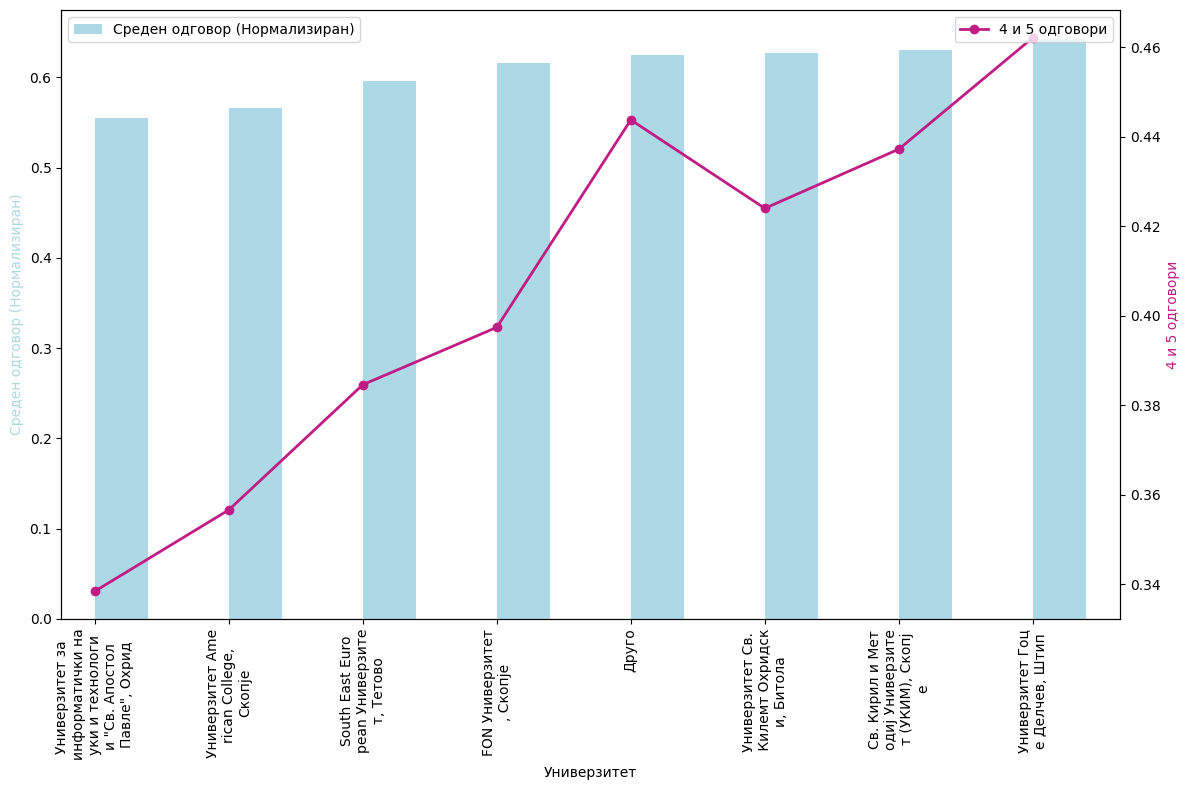

In [61]:
university_mapping = dict(zip(df['Q2'], df_notEncode['На кој унивезитет сте запишани?']))

selected_columns = df.loc[:, ['Q2'] + [f'Q{i}' for i in range(46, 59)]]

grouped = selected_columns.groupby('Q2')

average_answers = {}
proportions_4_5 = {}

for university_code, group_df in grouped:
    average_answer = group_df.iloc[:, 1:].mean().mean()
    average_answers[university_code] = average_answer

    answers_4_5 = (group_df.iloc[:, 1:] == 4) | (group_df.iloc[:, 1:] == 5)
    proportion_4_5 = answers_4_5.sum().sum() / answers_4_5.size
    proportions_4_5[university_code] = proportion_4_5

results_df = pd.DataFrame({
    'Average_Answer': average_answers,
    'Proportion_4_5': proportions_4_5
}).reset_index()

results_df['Normalized_Average_Answer'] = results_df['Average_Answer'] / 5

results_df['Normalized_Proportion_4_5'] = results_df['Proportion_4_5']

results_df['University'] = results_df['index'].map(university_mapping)
results_df = results_df.set_index('University')

results_df = results_df.sort_values(by='Normalized_Average_Answer')

def wrap_text(text, max_length=15):
    """Wrap text into multiple lines with a max length per line."""
    return '\n'.join([text[i:i+max_length] for i in range(0, len(text), max_length)])

results_df.index = results_df.index.map(wrap_text)
fig, ax1 = plt.subplots(figsize=(12, 8))

results_df['Normalized_Average_Answer'].plot(kind='bar', ax=ax1, color='lightblue', position=0, width=0.4, label='Среден одговор (Нормализиран)')

ax2 = ax1.twinx()
results_df['Normalized_Proportion_4_5'].plot(kind='line', ax=ax2, color='#c11c84', marker='o', linewidth=2, label='4 и 5 одговори')

ax1.set_xlabel('Универзитет')
ax1.set_ylabel('Среден одговор (Нормализиран)', color='lightblue')
ax2.set_ylabel('4 и 5 одговори', color='#c11c84')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.appl

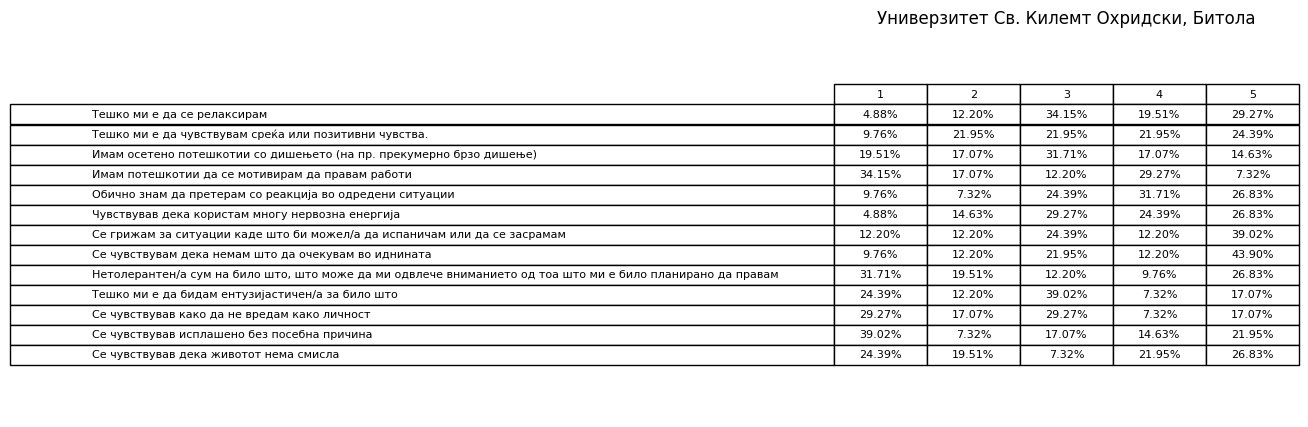

<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.appl

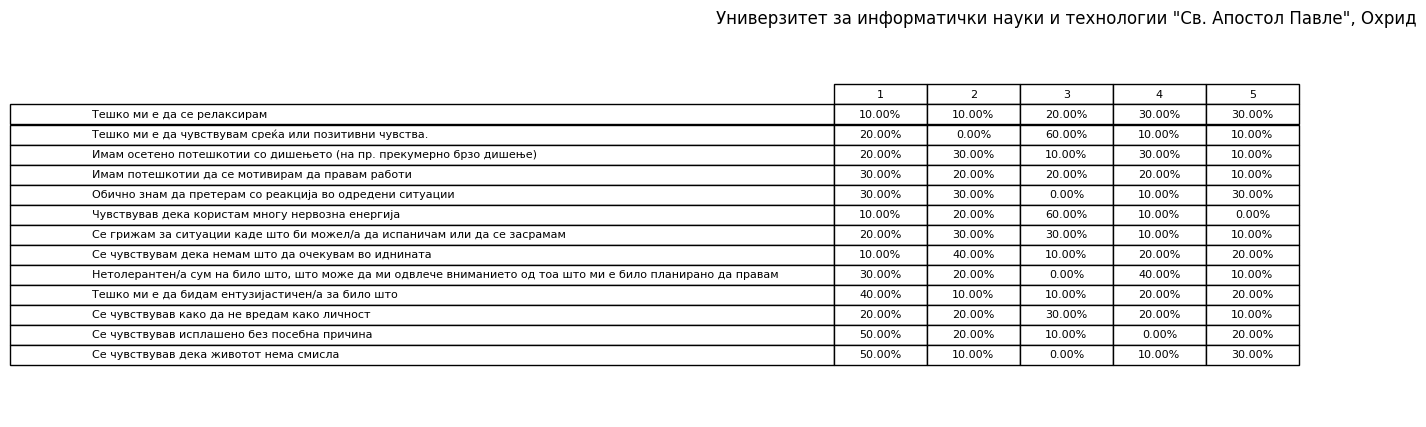

<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.appl

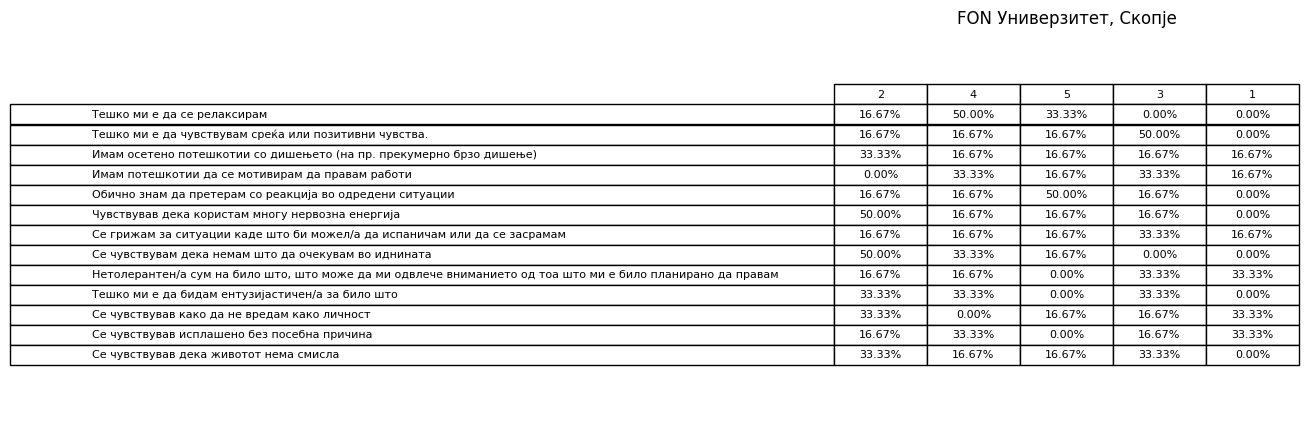

<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.appl

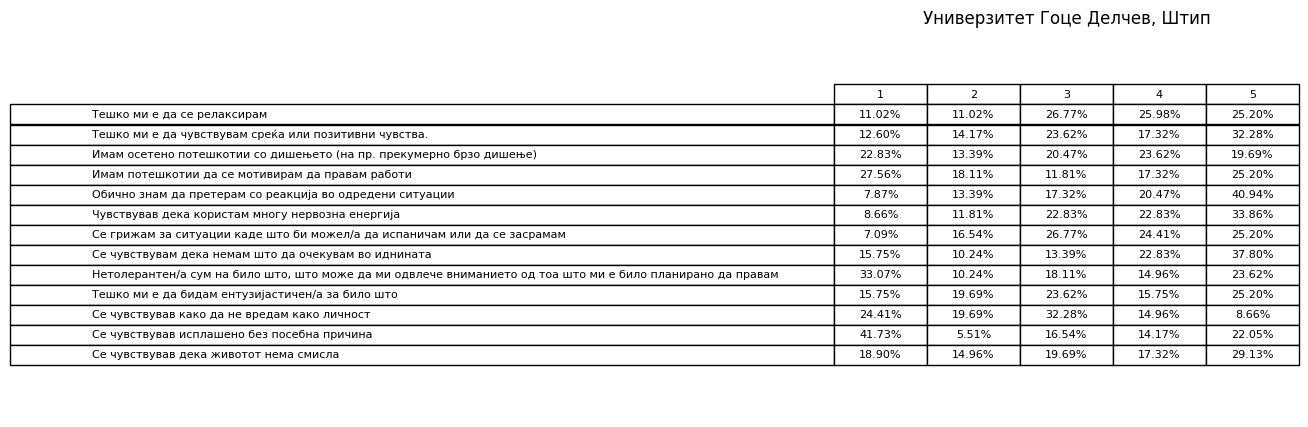

<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.appl

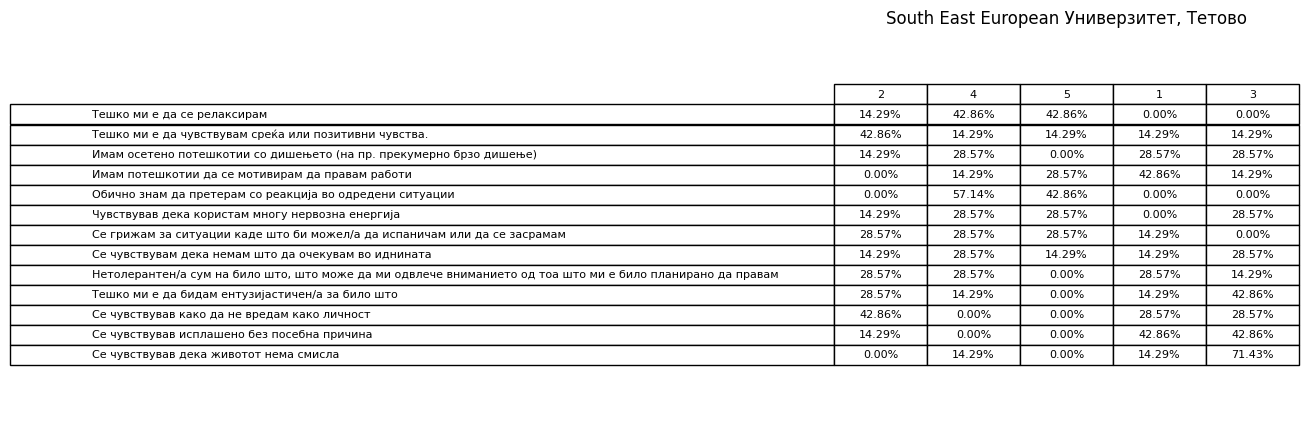

<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.appl

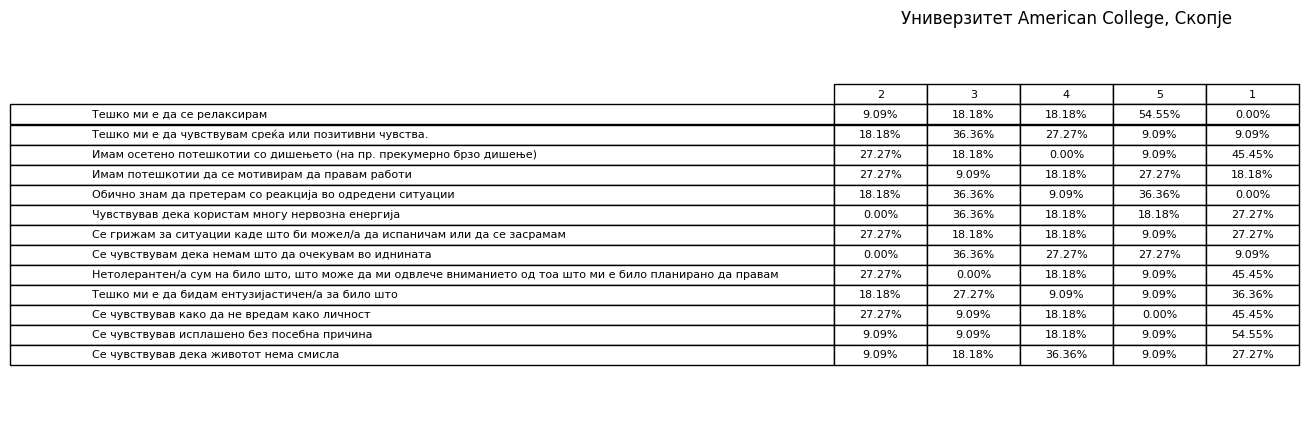

<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.appl

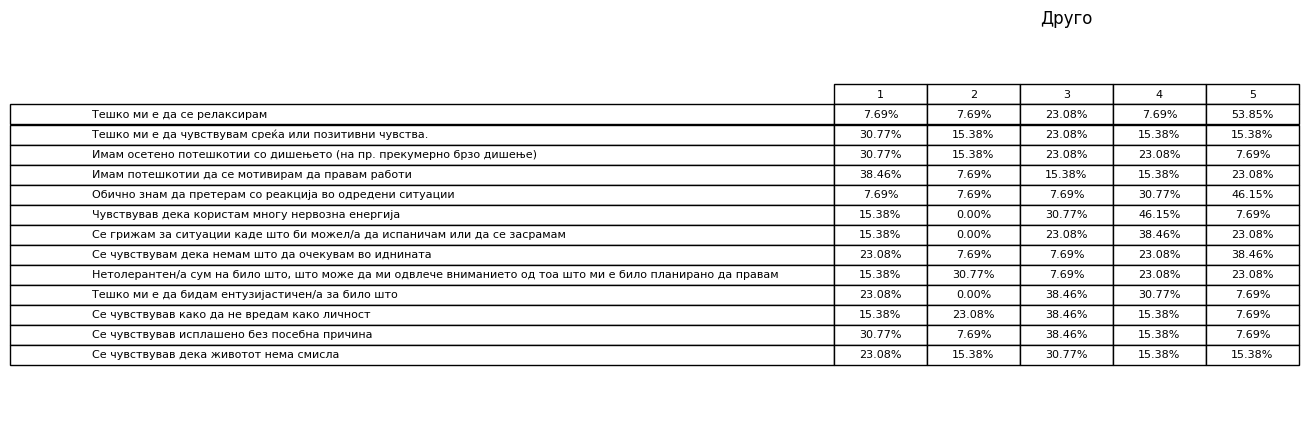

<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")
<ipython-input-62-625d5d785eec>:14: FutureWarning: DataFrame.appl

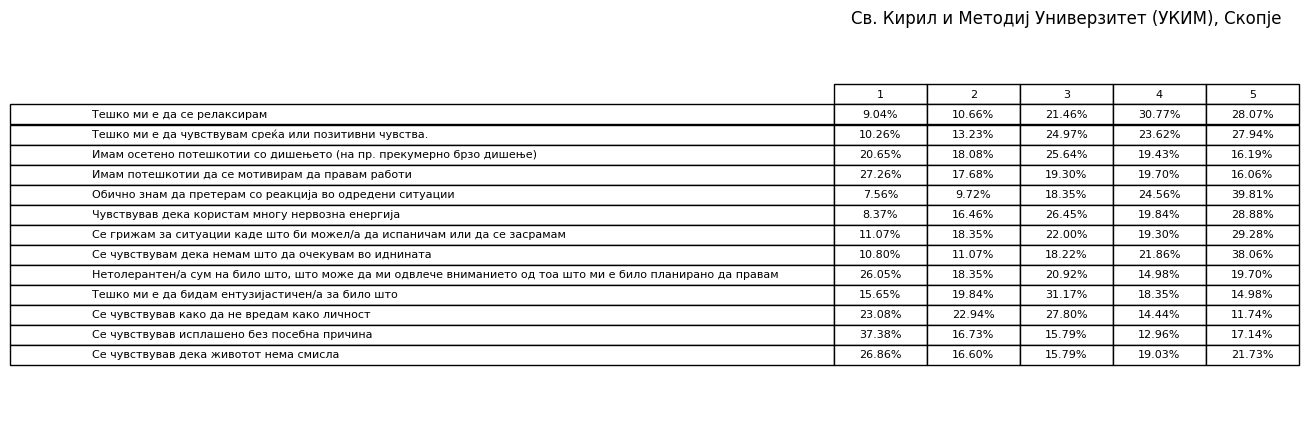

In [62]:
university_mapping = dict(zip(df['Q2'], df_notEncode['На кој унивезитет сте запишани?']))

selected_columns = df.loc[:, ['Q2'] + [f'Q{i}' for i in range(46, 59)]]

grouped = selected_columns.groupby('Q2')

for university_code, group_df in grouped:
    results = []

    for column in selected_columns.columns[1:]:
        cross_tab = pd.crosstab(index=group_df[column], columns='count')
        percentage = (cross_tab / cross_tab.sum() * 100).fillna(0)

        formatted_percentages = percentage.applymap(lambda x: f"{x:.2f}%")

        formatted_percentages = formatted_percentages.T
        formatted_percentages.index = [column]

        results.append(formatted_percentages)

    result_df = pd.concat(results, axis=0)

    result_df = result_df.fillna("0.00%")

    university_name = university_mapping.get(university_code, "Unknown University")

    fig, ax = plt.subplots(figsize=(5, 5))

    ax.axis('tight')
    ax.axis('off')

    table = ax.table(cellText=result_df.values,
                     colLabels=result_df.columns,
                     rowLabels=column_names,
                     cellLoc='center',
                     loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(1.2, 1.2)

    plt.title(f"{university_name}")

    plt.show()

2. По струка

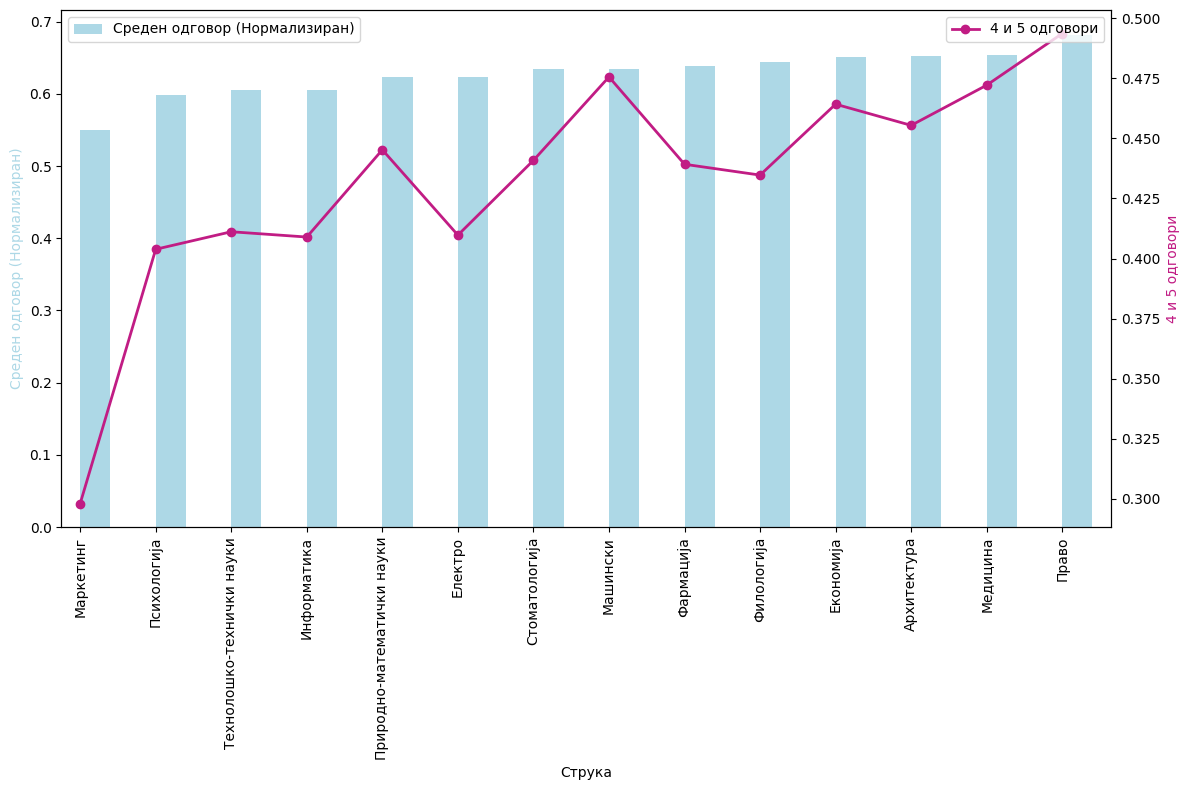

In [63]:
struka_mapping = dict(zip(df['Q8'], df_notEncode['Која е вашата струка/ програма на која студирате']))

selected_columns = df.loc[:, ['Q8'] + [f'Q{i}' for i in range(46, 59)]]

grouped = selected_columns.groupby('Q8')

average_answers = {}
proportions_4_5 = {}

for struka_code, group_df in grouped:
    average_answer = group_df.iloc[:, 1:].mean().mean()
    average_answers[struka_code] = average_answer

    answers_4_5 = (group_df.iloc[:, 1:] == 4) | (group_df.iloc[:, 1:] == 5)
    proportion_4_5 = answers_4_5.sum().sum() / answers_4_5.size
    proportions_4_5[struka_code] = proportion_4_5

results_df = pd.DataFrame({
    'Average_Answer': average_answers,
    'Proportion_4_5': proportions_4_5
}).reset_index()

results_df['Normalized_Average_Answer'] = results_df['Average_Answer'] / 5
results_df['Normalized_Proportion_4_5'] = results_df['Proportion_4_5']

results_df['Struka'] = results_df['index'].map(struka_mapping)

results_df = results_df.set_index('Struka')

results_df = results_df.sort_values(by='Normalized_Average_Answer')

fig, ax1 = plt.subplots(figsize=(12, 8))

results_df['Normalized_Average_Answer'].plot(kind='bar', ax=ax1, color='lightblue', position=0, width=0.4, label='Среден одговор (Нормализиран)')

ax2 = ax1.twinx()
results_df['Normalized_Proportion_4_5'].plot(kind='line', ax=ax2, color='#c11c84', marker='o', linewidth=2, label='4 и 5 одговори')

ax1.set_xlabel('Струка')
ax1.set_ylabel('Среден одговор (Нормализиран)', color='lightblue')
ax2.set_ylabel('4 и 5 одговори', color='#c11c84')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

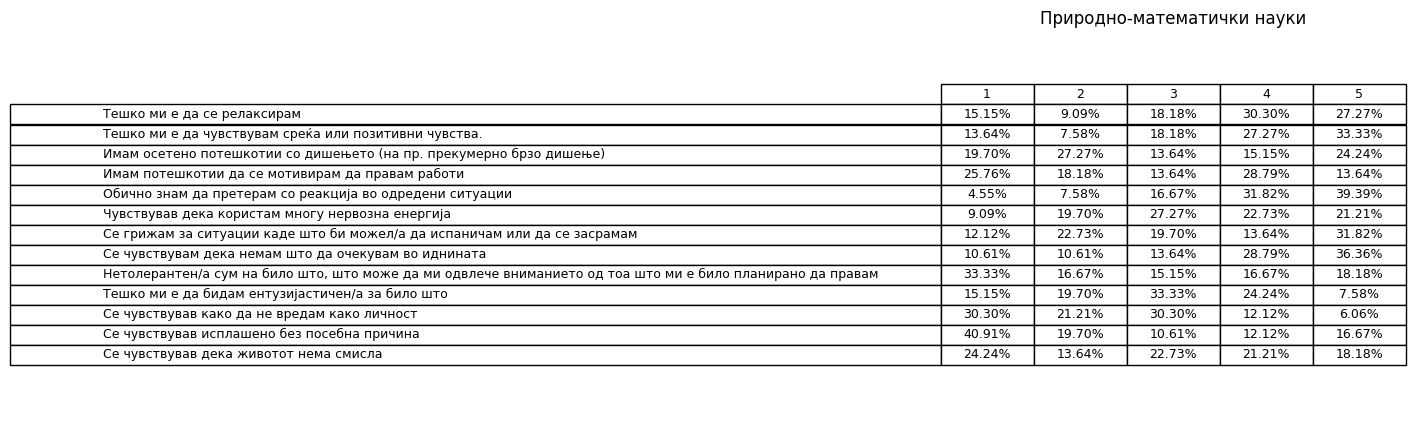

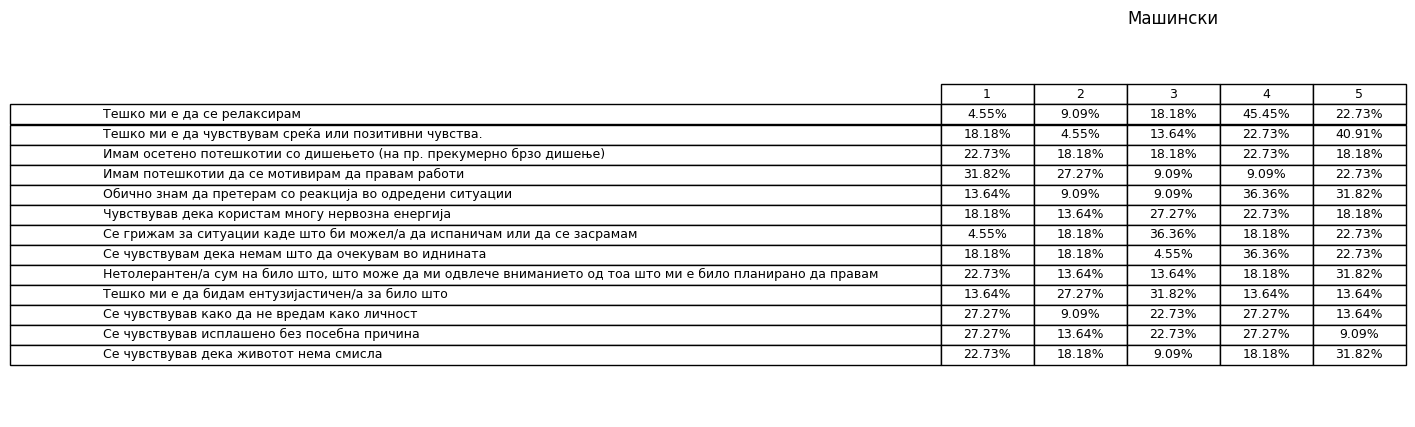

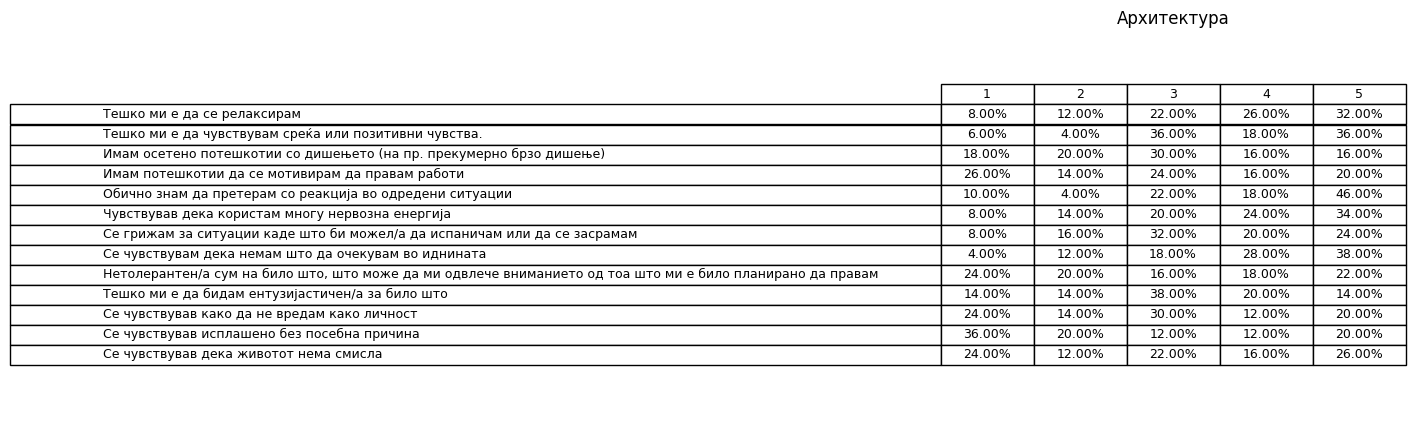

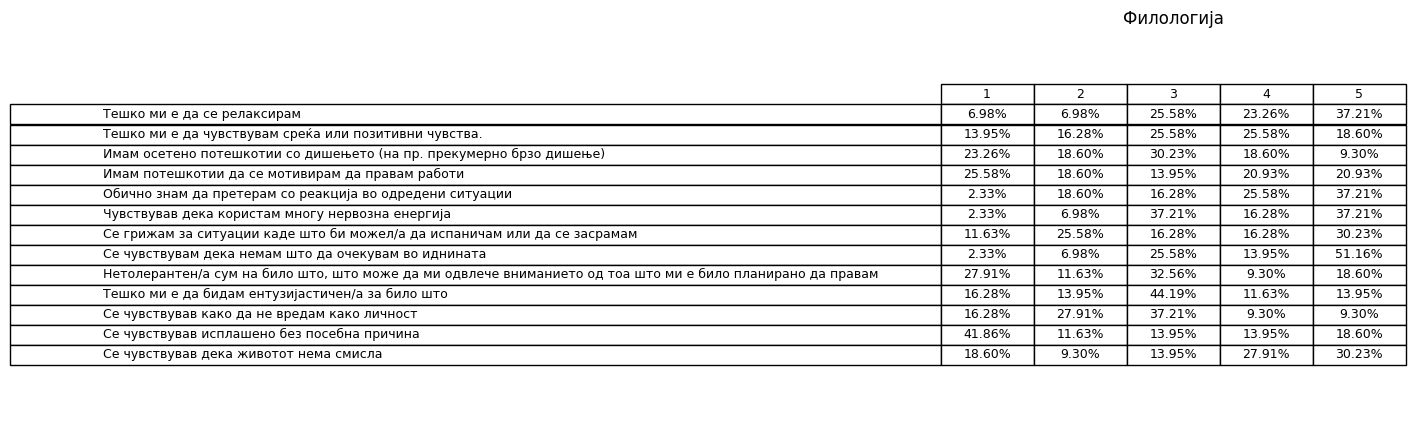

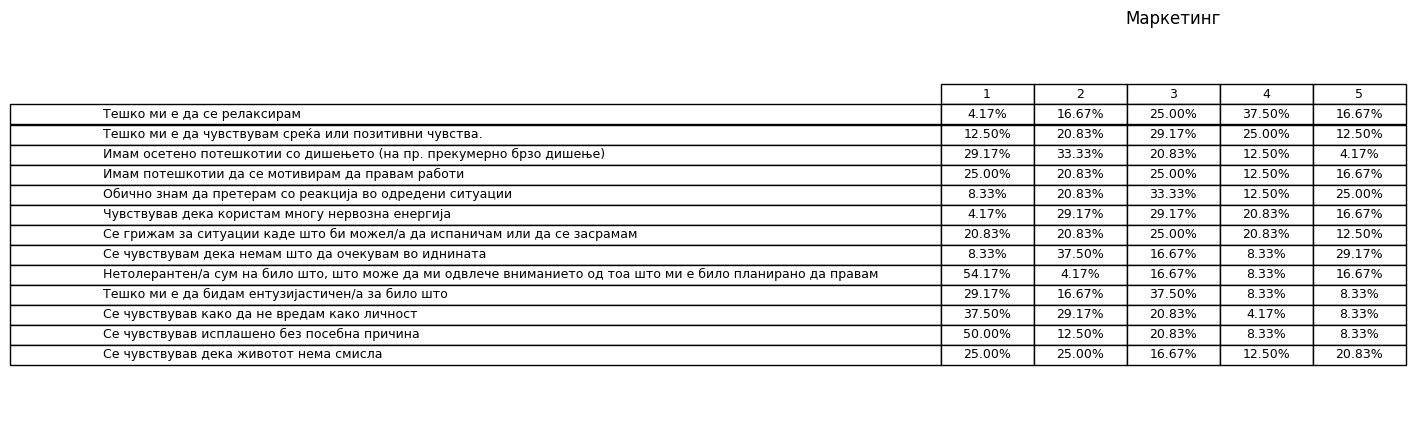

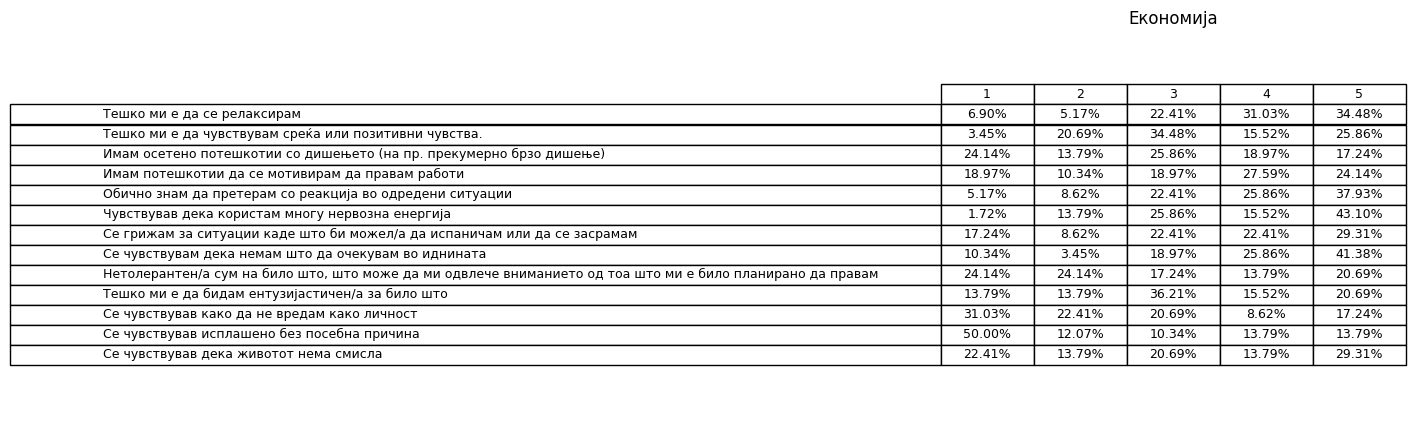

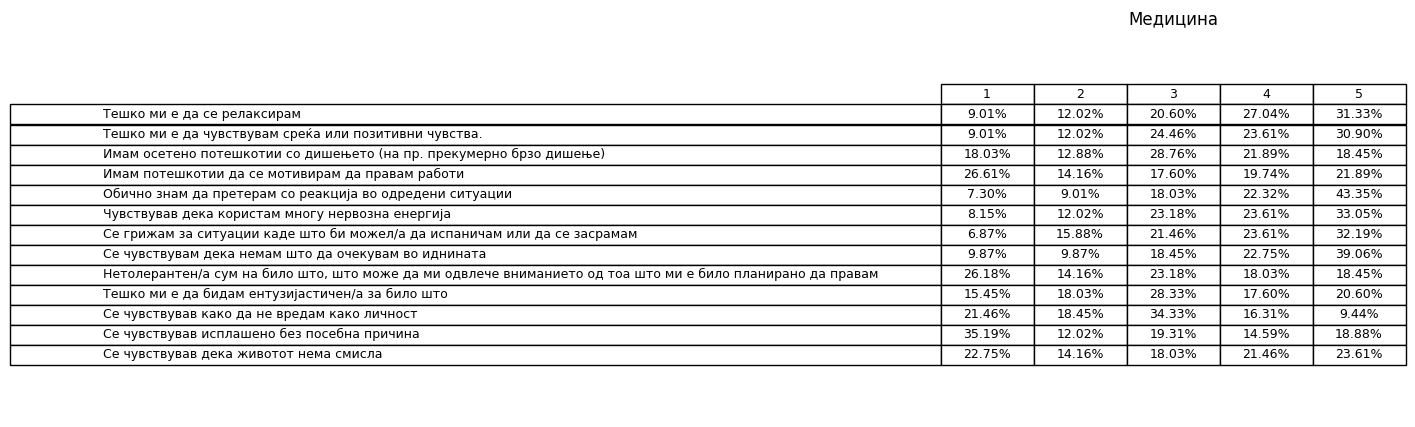

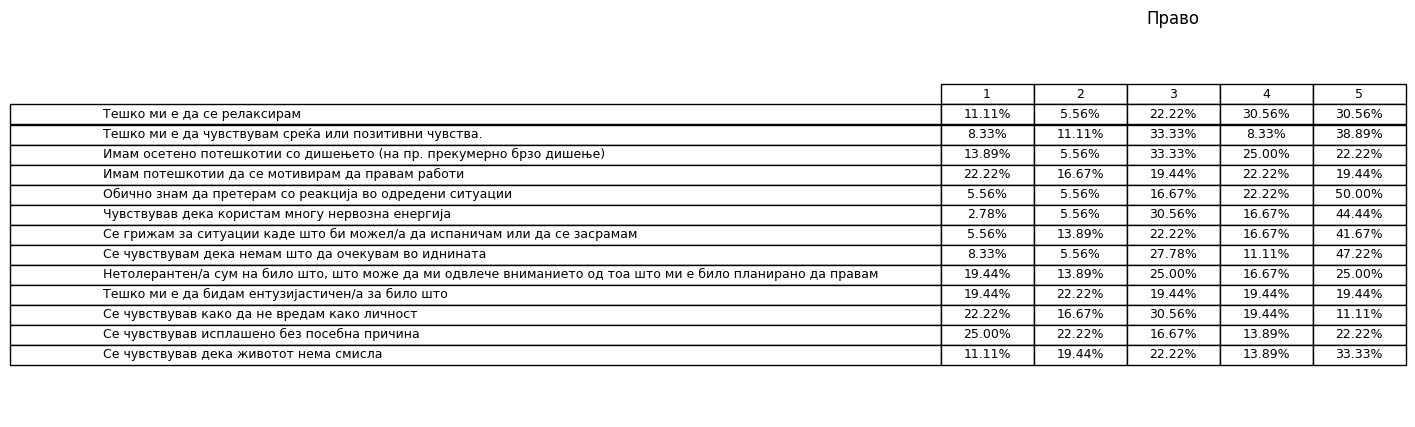

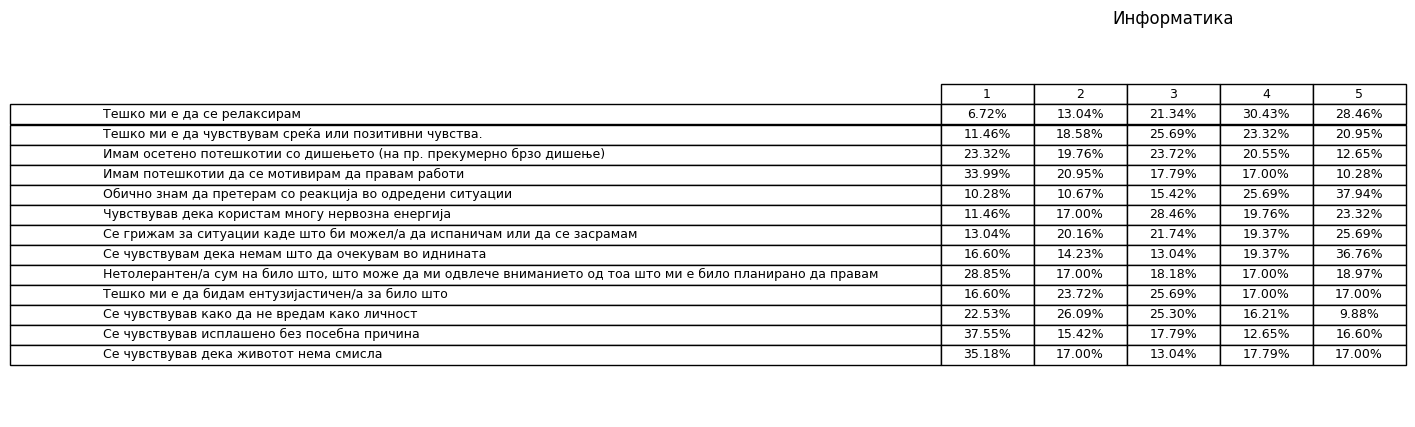

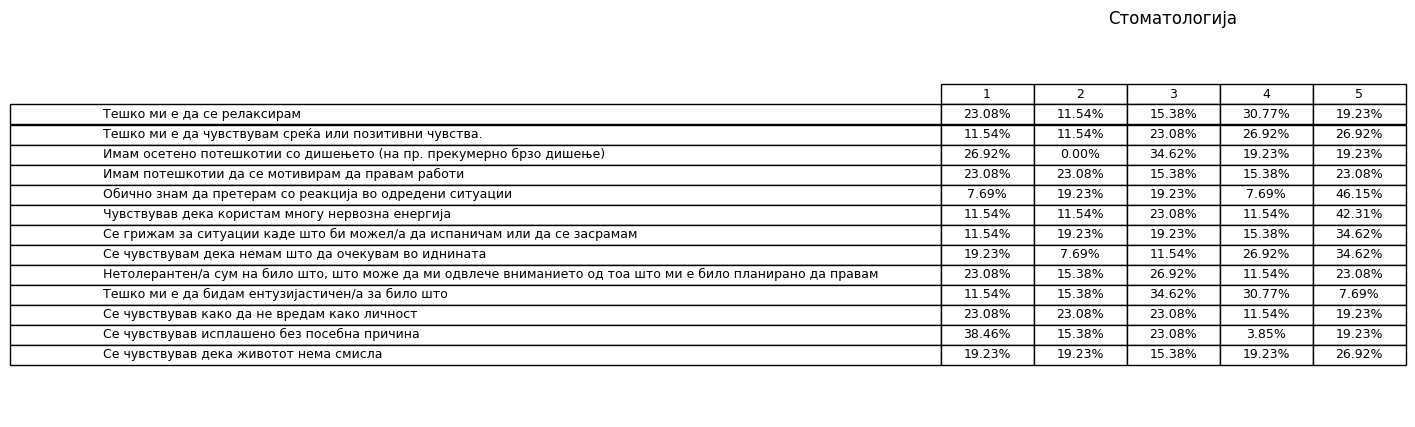

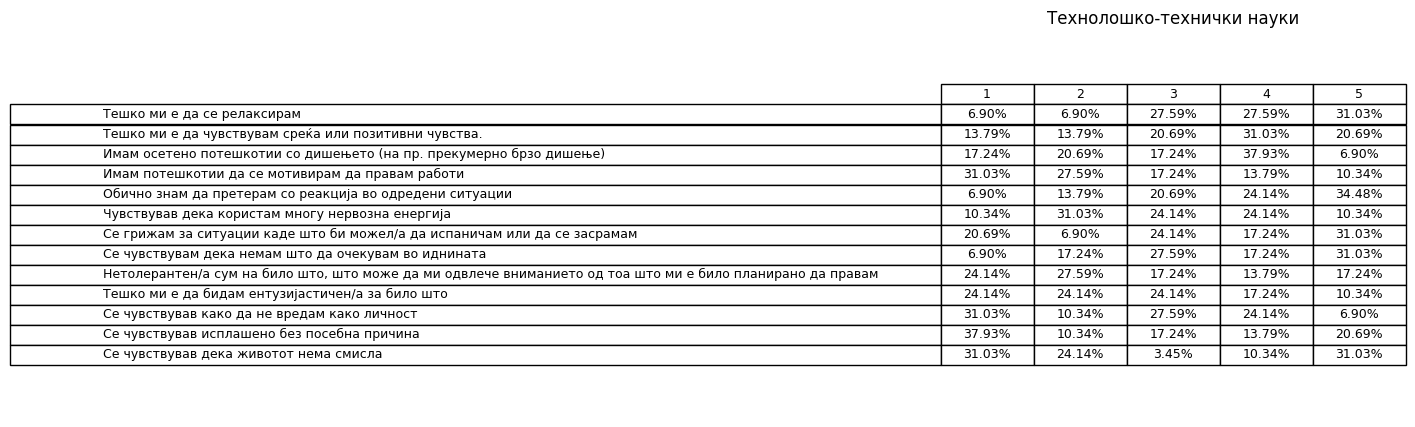

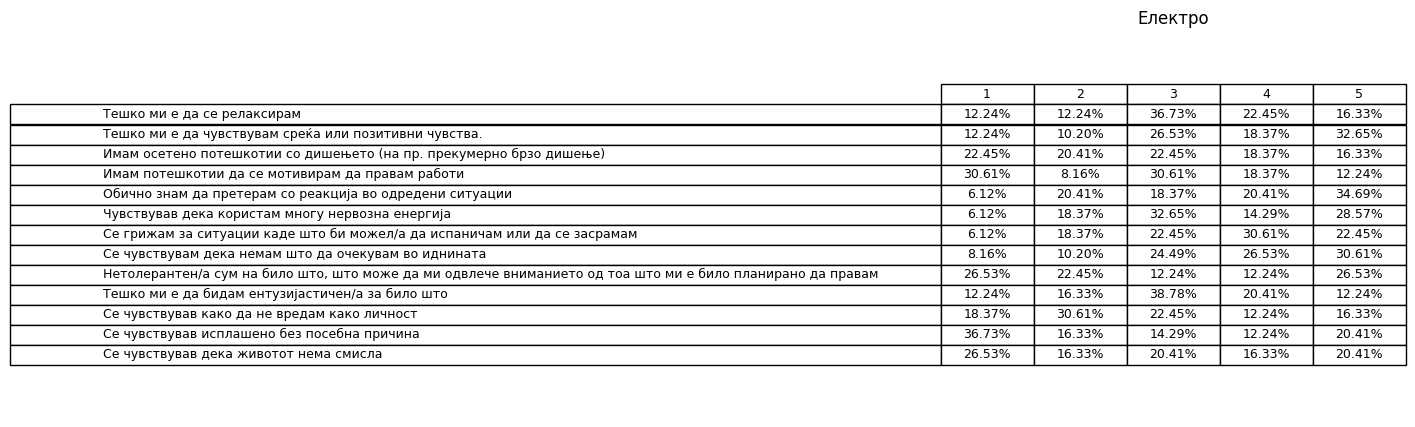

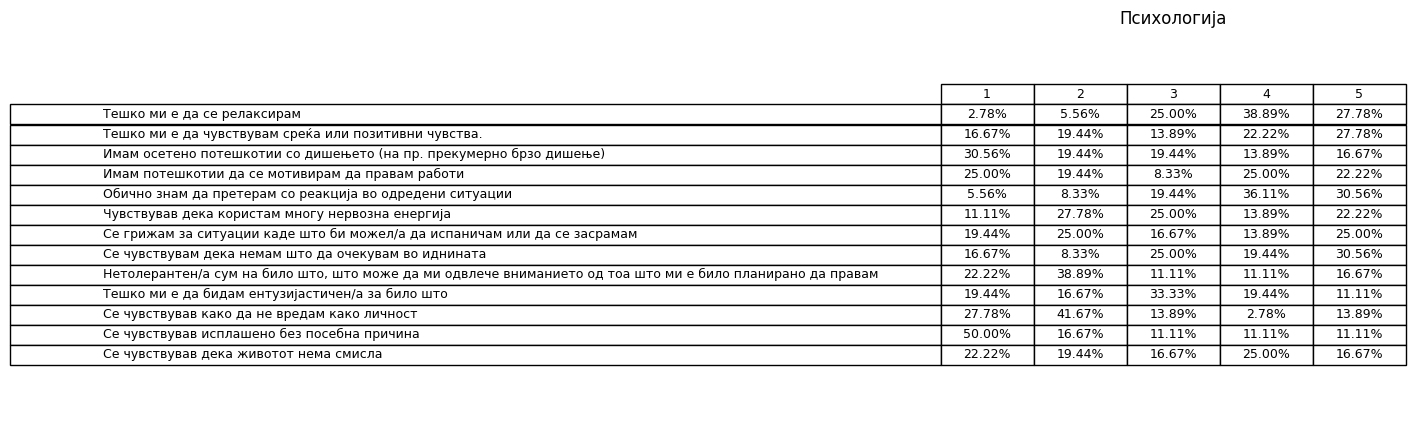

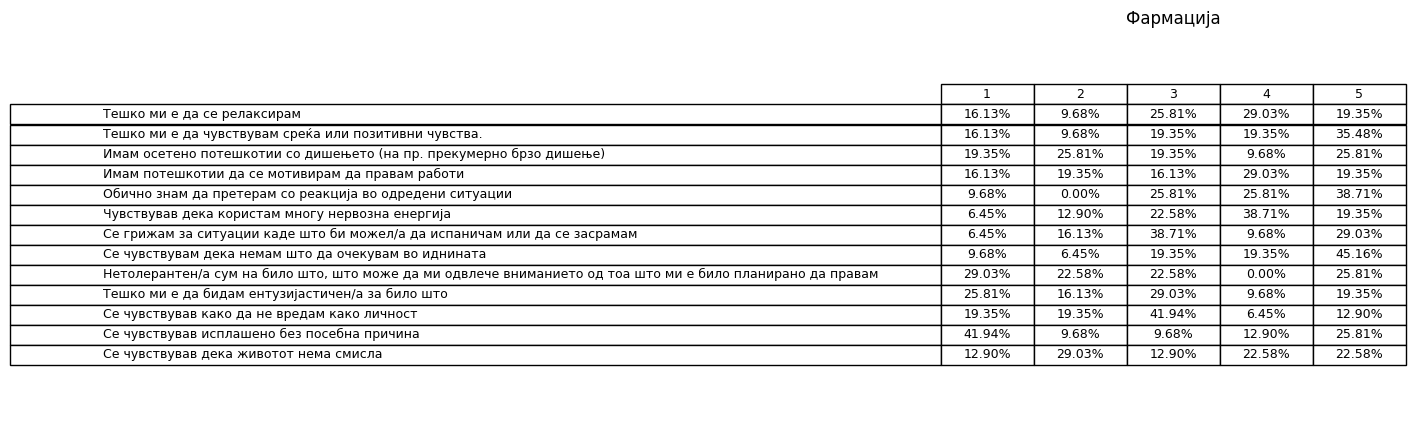

In [64]:
struka_mapping = dict(zip(df['Q8'], df_notEncode['Која е вашата струка/ програма на која студирате']))

selected_columns = df.loc[:, ['Q8'] + [f'Q{i}' for i in range(46, 59)]]

grouped = selected_columns.groupby('Q8')

for struka_code, group_df in grouped:
    results = []

    for column in selected_columns.columns[1:]:

        cross_tab = pd.crosstab(index=group_df[column], columns='count')
        percentage = (cross_tab / cross_tab.sum() * 100).fillna(0)

        formatted_percentages = percentage.map(lambda x: f"{x:.2f}%")

        formatted_percentages = formatted_percentages.T
        formatted_percentages.index = [column]

        results.append(formatted_percentages)

    result_df = pd.concat(results, axis=0)

    result_df = result_df.fillna("0.00%")


    struka_name = struka_mapping.get(struka_code, "Struka")

    fig, ax = plt.subplots(figsize=(5, 5))

    ax.axis('tight')
    ax.axis('off')

    table = ax.table(cellText=result_df.values,
                     colLabels=result_df.columns,
                     rowLabels=column_names,
                     cellLoc='center',
                     loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 1.2)

    plt.title(f"{struka_name}")

    plt.show()

<ipython-input-65-d194007b2ac0>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_df = result_df.applymap(lambda x: float(str(x).replace("%", "")))


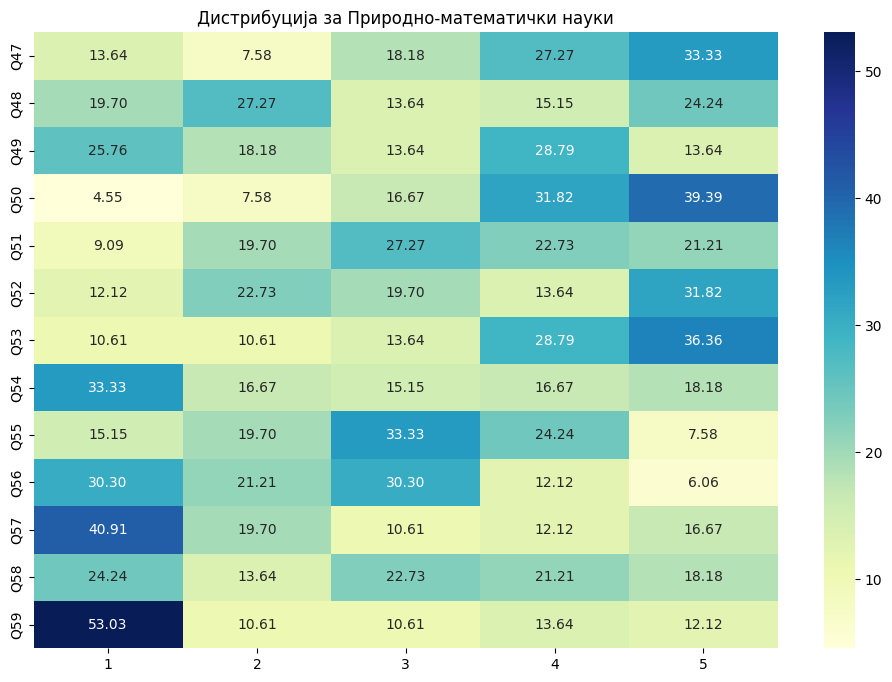

<ipython-input-65-d194007b2ac0>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_df = result_df.applymap(lambda x: float(str(x).replace("%", "")))


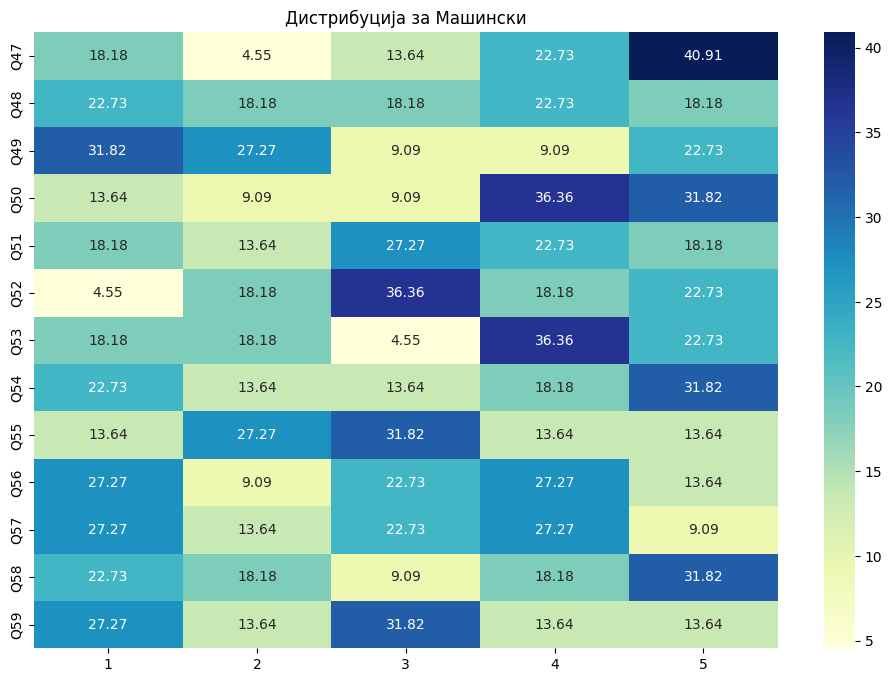

<ipython-input-65-d194007b2ac0>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_df = result_df.applymap(lambda x: float(str(x).replace("%", "")))


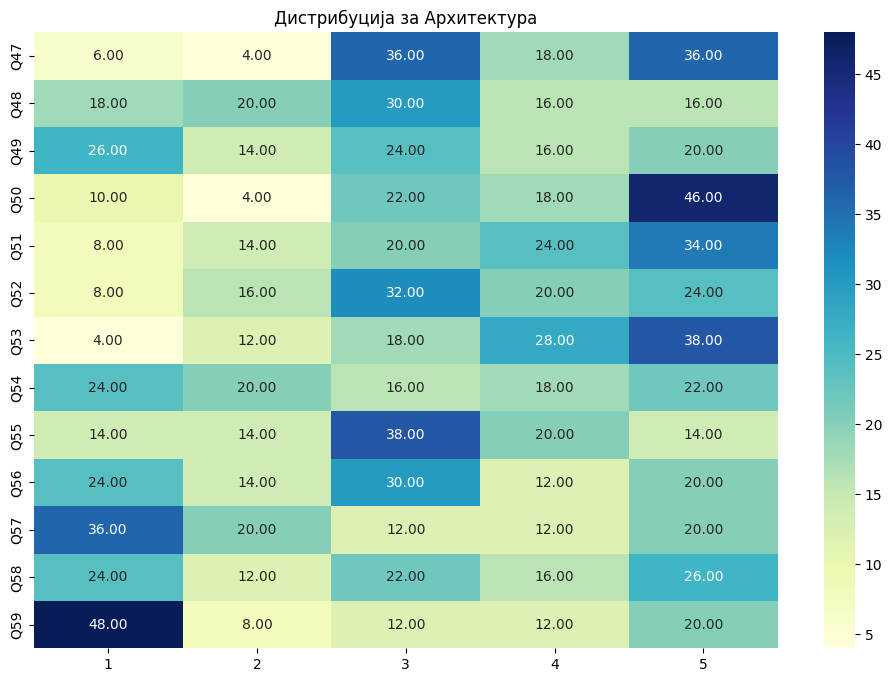

<ipython-input-65-d194007b2ac0>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_df = result_df.applymap(lambda x: float(str(x).replace("%", "")))


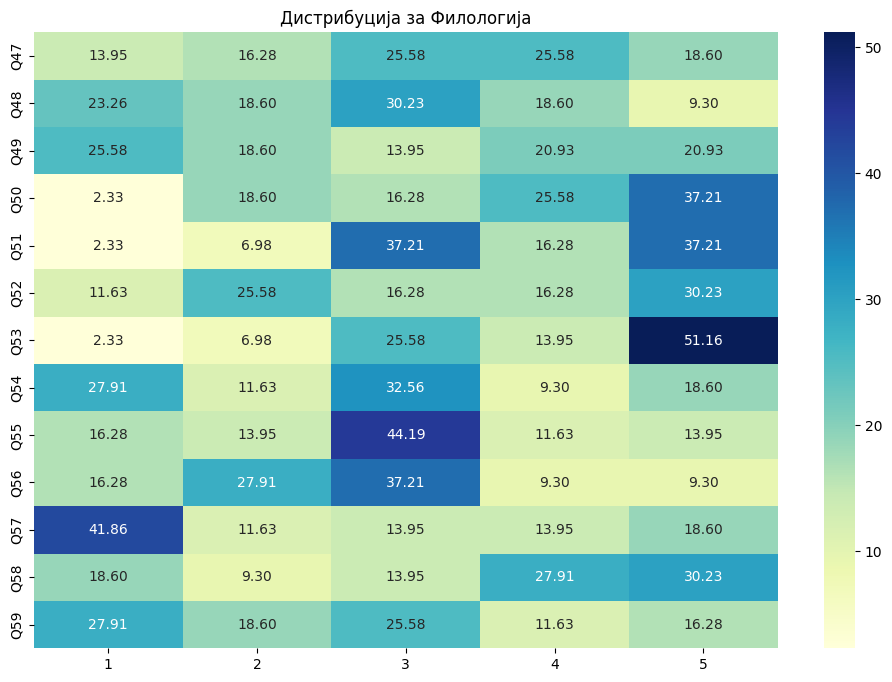

<ipython-input-65-d194007b2ac0>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_df = result_df.applymap(lambda x: float(str(x).replace("%", "")))


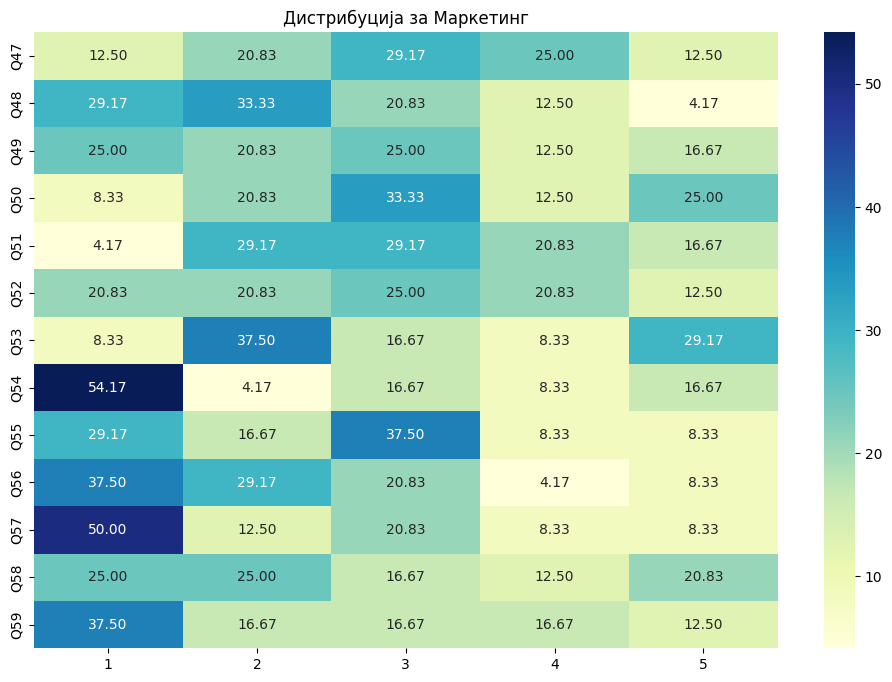

<ipython-input-65-d194007b2ac0>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_df = result_df.applymap(lambda x: float(str(x).replace("%", "")))


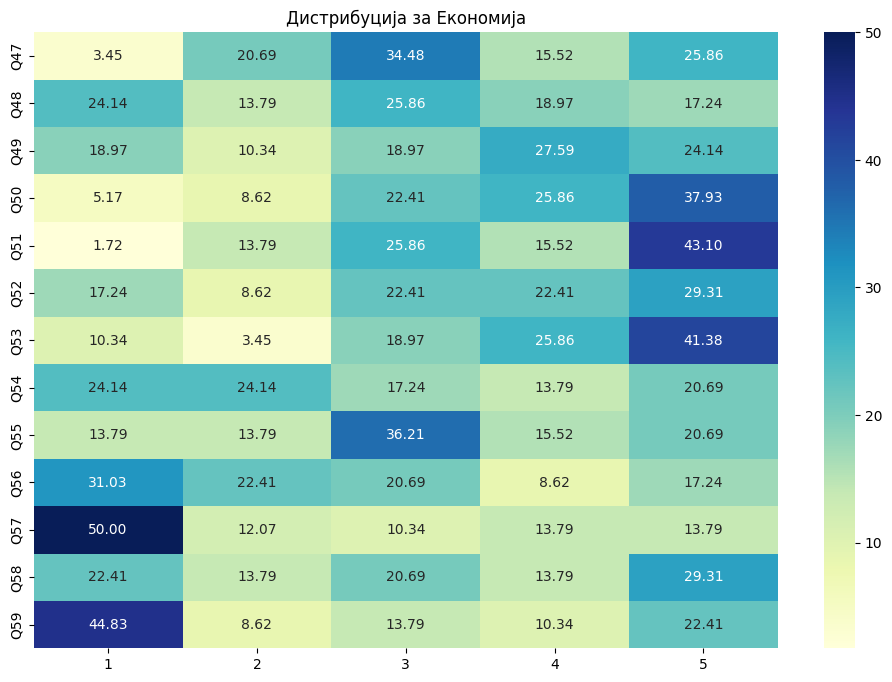

<ipython-input-65-d194007b2ac0>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_df = result_df.applymap(lambda x: float(str(x).replace("%", "")))


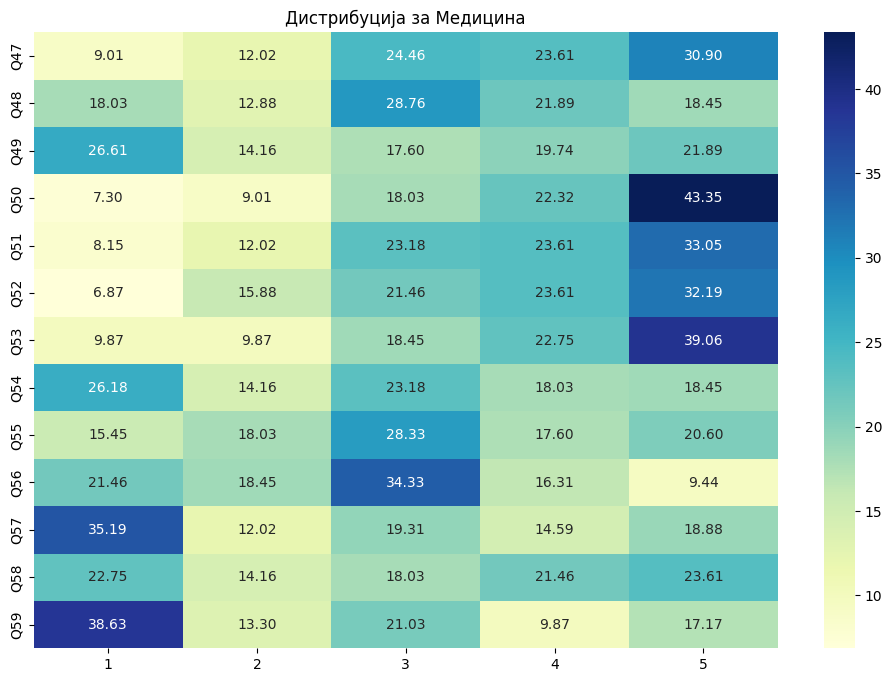

<ipython-input-65-d194007b2ac0>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_df = result_df.applymap(lambda x: float(str(x).replace("%", "")))


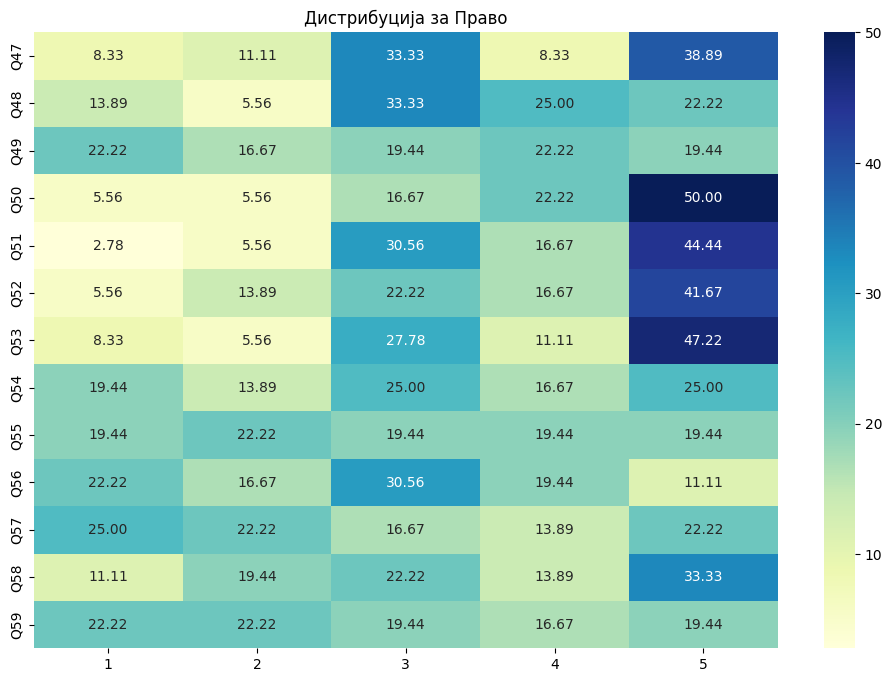

<ipython-input-65-d194007b2ac0>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_df = result_df.applymap(lambda x: float(str(x).replace("%", "")))


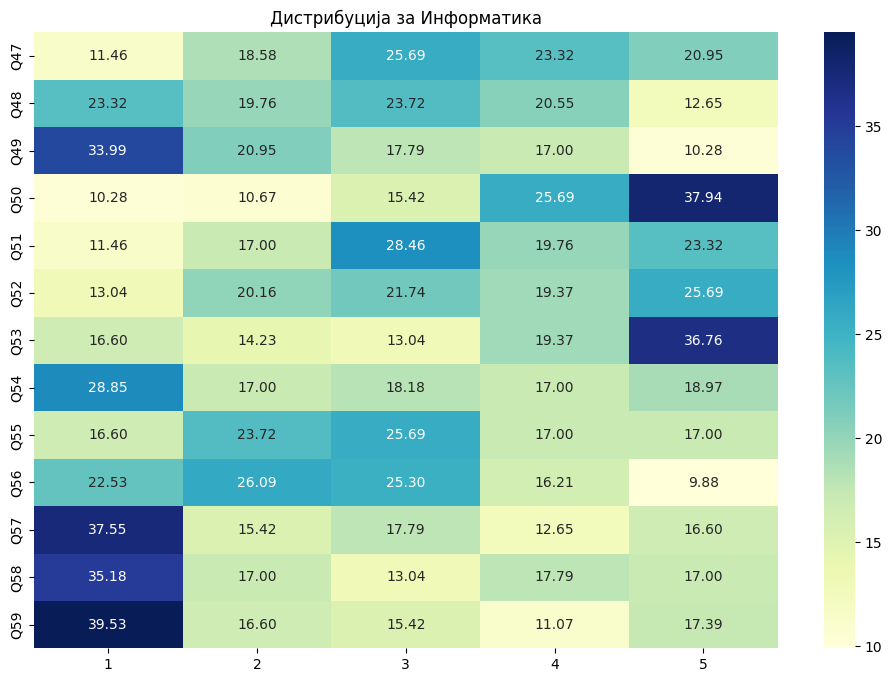

<ipython-input-65-d194007b2ac0>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_df = result_df.applymap(lambda x: float(str(x).replace("%", "")))


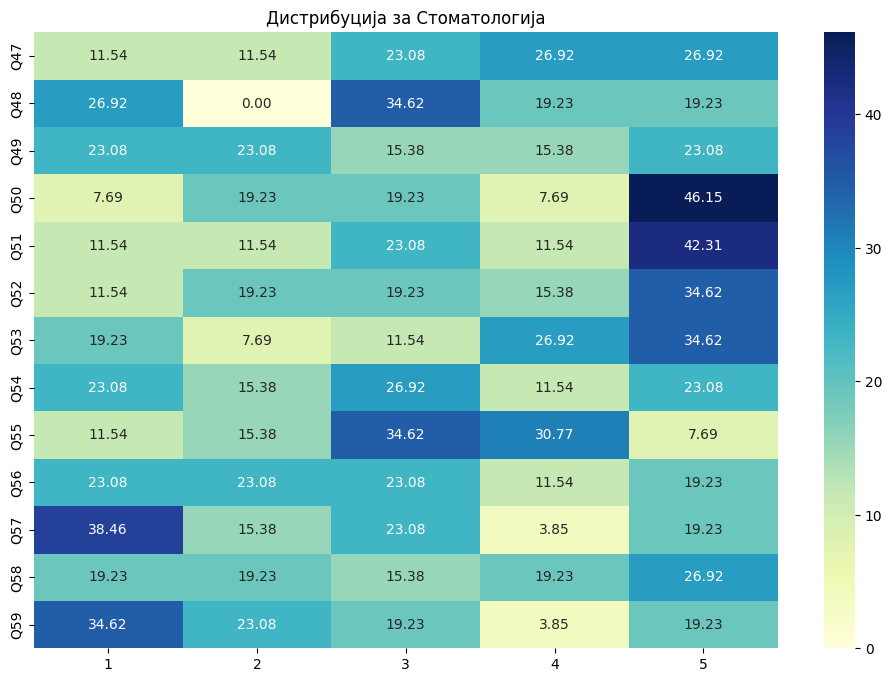

<ipython-input-65-d194007b2ac0>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_df = result_df.applymap(lambda x: float(str(x).replace("%", "")))


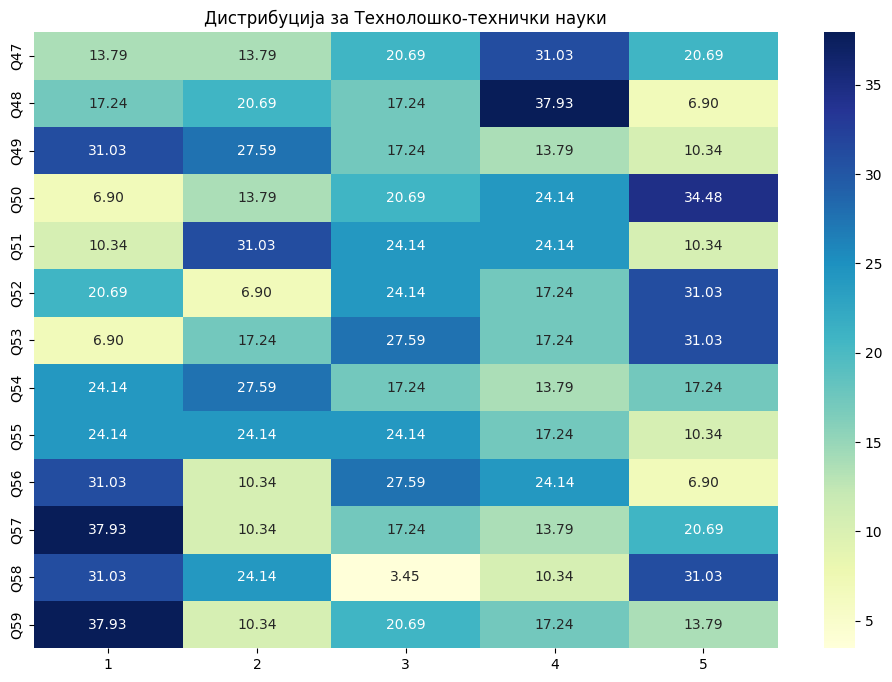

<ipython-input-65-d194007b2ac0>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_df = result_df.applymap(lambda x: float(str(x).replace("%", "")))


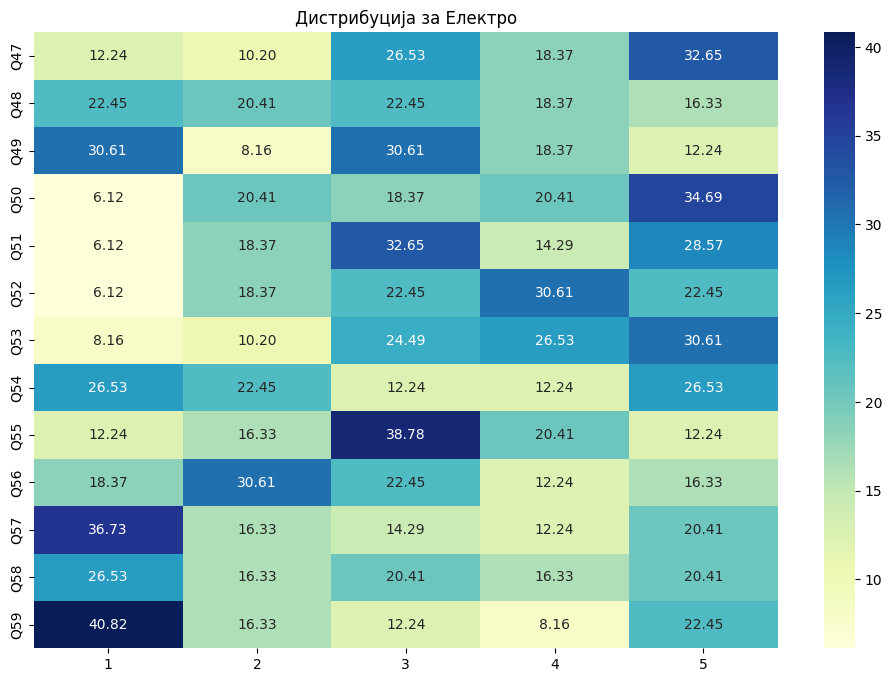

<ipython-input-65-d194007b2ac0>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_df = result_df.applymap(lambda x: float(str(x).replace("%", "")))


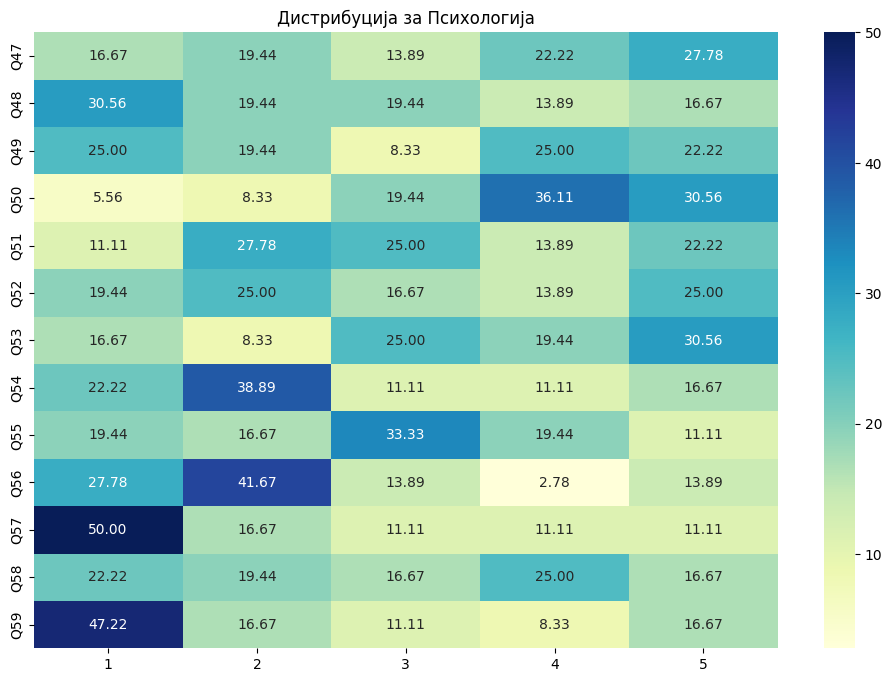

<ipython-input-65-d194007b2ac0>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_df = result_df.applymap(lambda x: float(str(x).replace("%", "")))


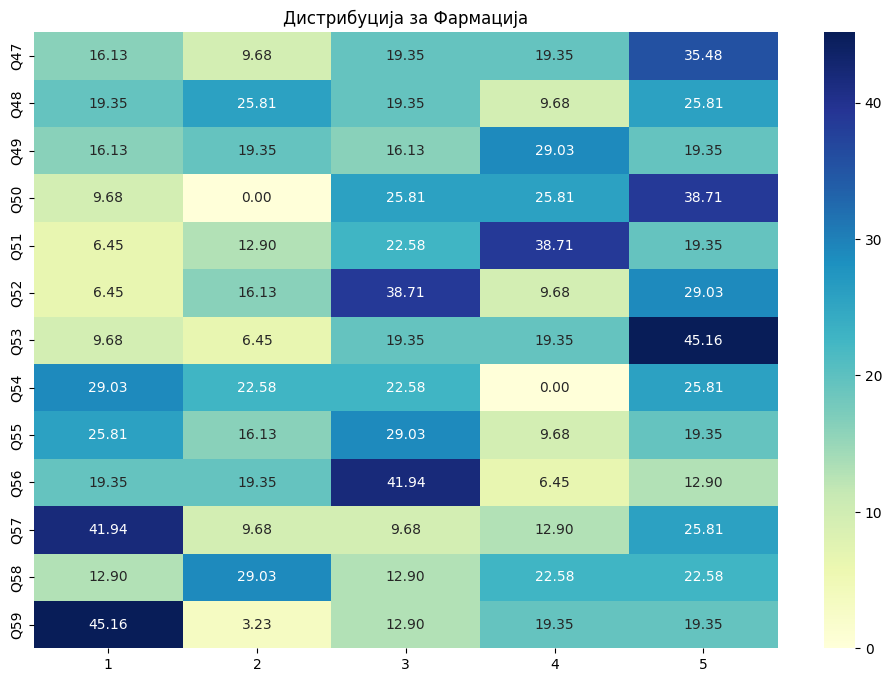

In [65]:
struka_mapping = dict(zip(df['Q8'], df_notEncode['Која е вашата струка/ програма на која студирате']))

selected_columns = df.loc[:, ['Q8'] + [f'Q{i}' for i in range(47, 60)]]

grouped = selected_columns.groupby('Q8')

for struka_code, group_df in grouped:
    results = []

    for column in selected_columns.columns[1:]:
        cross_tab = pd.crosstab(index=group_df[column], columns='count')
        percentage = (cross_tab / cross_tab.sum() * 100).fillna(0)

        formatted_percentages = percentage.T
        formatted_percentages.index = [column]

        results.append(formatted_percentages)

    result_df = pd.concat(results, axis=0)

    result_df = result_df.fillna(0.0)

    result_df = result_df.applymap(lambda x: float(str(x).replace("%", "")))

    struka_name = struka_mapping.get(struka_code, "Unknown Struka")

    plt.figure(figsize=(12, 8))

    sns.heatmap(result_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)

    plt.title(f"Дистрибуција за {struka_name}")

    plt.show()

# Модели за предвидување за влошување на менталното здравје на студентите
(доколку не се превземат никакви мерки)

**1. По универзитет**

Support Vector Classifier's accuracy: 41.1458
              precision    recall  f1-score   support

           0       0.09      0.30      0.14        10
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.15      0.28      0.20        25
           4       0.00      0.00      0.00         2
           5       0.12      0.50      0.20         2
           6       0.00      0.00      0.00         4
           7       0.84      0.46      0.60       147

    accuracy                           0.41       192
   macro avg       0.15      0.19      0.14       192
weighted avg       0.67      0.41      0.49       192



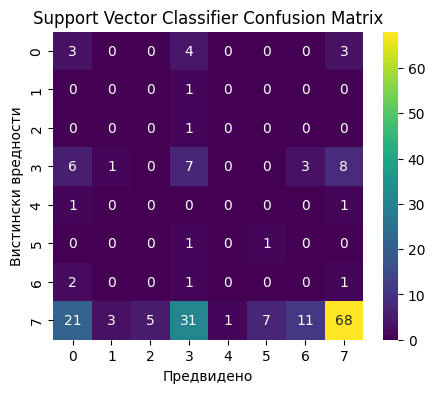

---------------------------------------------------------------------- 

Decision Tree Classifier's accuracy: 64.0625
              precision    recall  f1-score   support

           0       0.33      0.20      0.25        10
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.30      0.32      0.31        25
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         4
           7       0.78      0.77      0.77       147

    accuracy                           0.64       192
   macro avg       0.18      0.16      0.17       192
weighted avg       0.65      0.64      0.65       192



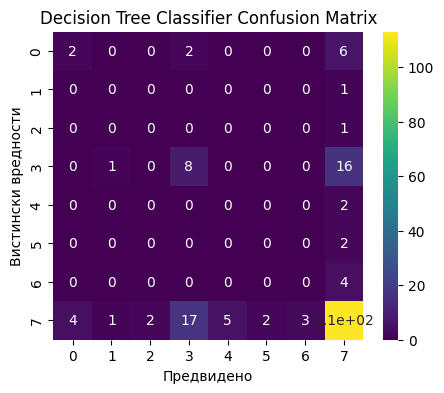

---------------------------------------------------------------------- 

Random Forest Classifier's accuracy: 76.5625
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.50      0.08      0.14        25
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         4
           7       0.77      0.99      0.87       147

    accuracy                           0.77       192
   macro avg       0.16      0.13      0.13       192
weighted avg       0.66      0.77      0.68       192



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


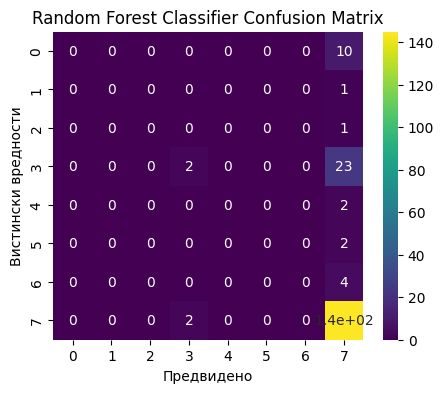

---------------------------------------------------------------------- 



In [66]:
X = df[['Q8','Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59']]
y = df['Q2']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train_uni, X_test, Y_train_uni, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Support Vector Classifier": SVC(class_weight='balanced', random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest Classifier": RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators = 100, min_samples_split = 5, min_samples_leaf=1),
}

results = []

for name, model in models.items():
    model.fit(X_train_uni, Y_train_uni)

    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred) * 100
    cm = confusion_matrix(Y_test, Y_pred)
    results.append({"Model": name, "Accuracy": round(accuracy, 4)})

    print(f"{name}'s accuracy: {round(accuracy, 4)}")
    print(classification_report(Y_test, Y_pred))

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, cmap="viridis")
    plt.xlabel("Предвидено")
    plt.ylabel("Вистински вредности")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    print("-" * 70, "\n")

In [67]:
evaluation_df = pd.DataFrame(results)
evaluation_df

Model  Accuracy
0  Support Vector Classifier   41.1458
1   Decision Tree Classifier   64.0625
2   Random Forest Classifier   76.5625

In [68]:
model_uni = RandomForestClassifier(class_weight='balanced',random_state=42)
model_uni.fit(X_train_uni,Y_train_uni)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [69]:
pred_uni = model_uni.predict(X_test)

In [70]:
pred_df = pd.DataFrame(pred_uni)
y_test = pd.DataFrame(Y_test)

In [71]:
print(classification_report(y_test, pred_df))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.33      0.04      0.07        25
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         4
           7       0.77      0.99      0.86       147

    accuracy                           0.76       192
   macro avg       0.14      0.13      0.12       192
weighted avg       0.63      0.76      0.67       192



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


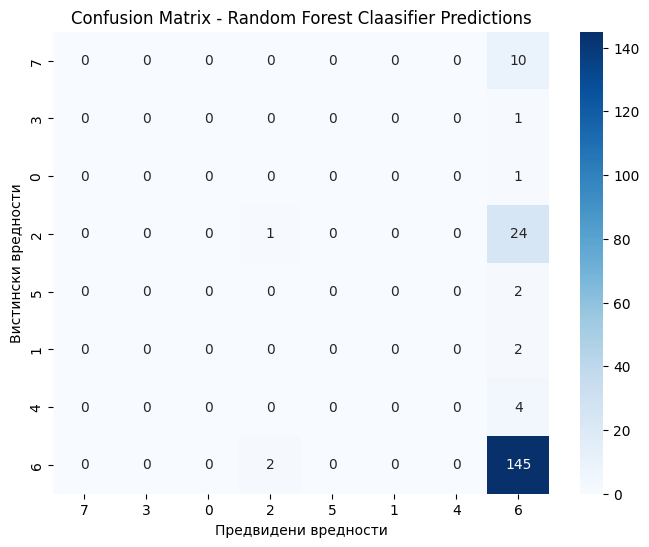

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.33      0.04      0.07        25
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         4
           7       0.77      0.99      0.86       147

    accuracy                           0.76       192
   macro avg       0.14      0.13      0.12       192
weighted avg       0.63      0.76      0.67       192



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [72]:
from sklearn.metrics import classification_report, confusion_matrix
unique_labels = df['Q2'].unique()

conf_matrix = confusion_matrix(Y_test, pred_uni)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.ylabel('Вистински вредности')
plt.xlabel('Предвидени вредности')
plt.title('Confusion Matrix - Random Forest Claasifier Predictions')
plt.show()

print(classification_report(Y_test, pred_uni))

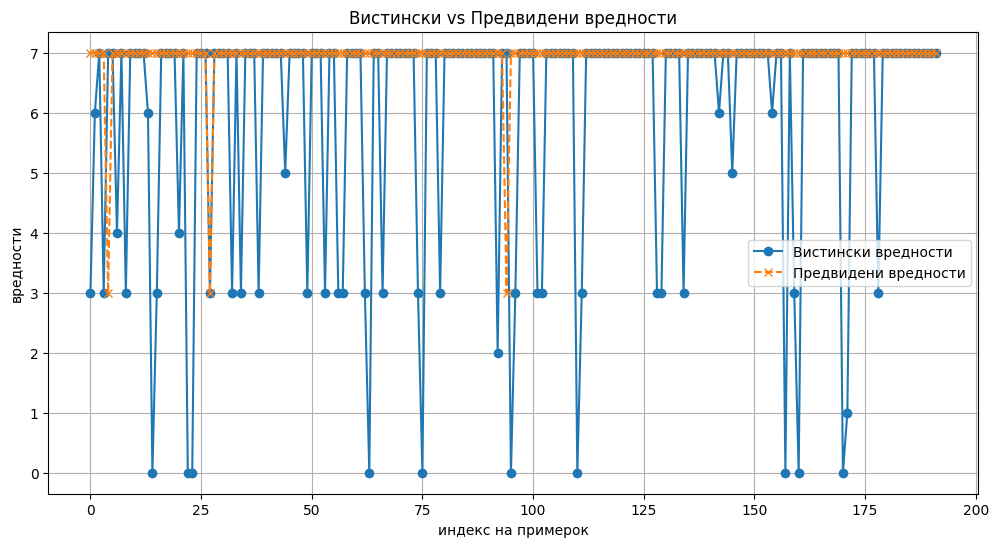

In [73]:
pred_df = pd.DataFrame(pred_uni, columns=['Predicted'])
y_test_df = pd.DataFrame(Y_test.values, columns=['Actual'])

plot_df = pd.concat([y_test_df.reset_index(drop=True), pred_df.reset_index(drop=True)], axis=1)

plt.figure(figsize=(12, 6))
plt.plot(plot_df.index, plot_df['Actual'], label='Вистински вредности', linestyle='-', marker='o')
plt.plot(plot_df.index, plot_df['Predicted'], label='Предвидени вредности', linestyle='--', marker='x')
plt.xlabel('индекс на примерок')
plt.ylabel('вредности')
plt.title('Вистински vs Предвидени вредности')
plt.legend()
plt.grid(True)
plt.show()

**2. По струка**

Support Vector Classifier's accuracy: 26.0417
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.14      0.17      0.15         6
           2       0.33      0.36      0.34        14
           3       0.15      0.18      0.17        11
           4       0.33      0.80      0.47         5
           5       0.04      0.09      0.06        11
           6       0.56      0.24      0.33        42
           7       0.09      0.40      0.14         5
           8       0.46      0.29      0.36        45
           9       0.00      0.00      0.00         5
          10       0.14      0.33      0.20         6
          11       0.10      0.09      0.10        11
          12       0.29      0.18      0.22        11
          13       0.40      0.29      0.33         7

    accuracy                           0.26       192
   macro avg       0.25      0.27      0.24       192
weighted avg       0.36      0.26 

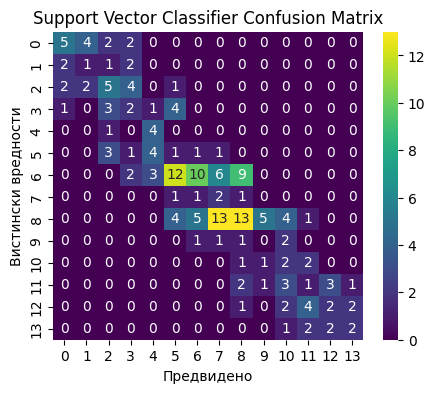

---------------------------------------------------------------------- 

Decision Tree Classifier's accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00        45
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.00         7

    accuracy                           1.00       192
   macro avg      

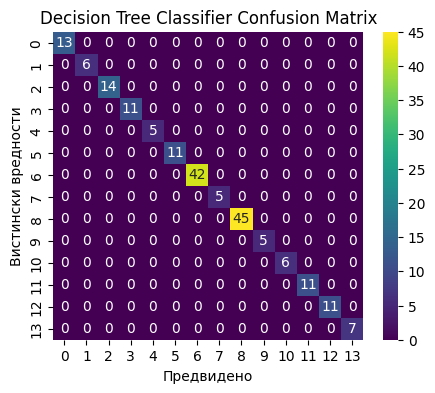

---------------------------------------------------------------------- 

Random Forest Classifier's accuracy: 71.3542
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        13
           1       1.00      0.17      0.29         6
           2       0.90      0.64      0.75        14
           3       0.75      0.55      0.63        11
           4       0.50      0.20      0.29         5
           5       0.00      0.00      0.00        11
           6       0.67      0.98      0.80        42
           7       1.00      0.20      0.33         5
           8       0.70      0.96      0.81        45
           9       0.00      0.00      0.00         5
          10       1.00      0.33      0.50         6
          11       0.67      0.73      0.70        11
          12       1.00      0.45      0.62        11
          13       1.00      1.00      1.00         7

    accuracy                           0.71       192
   macro avg    

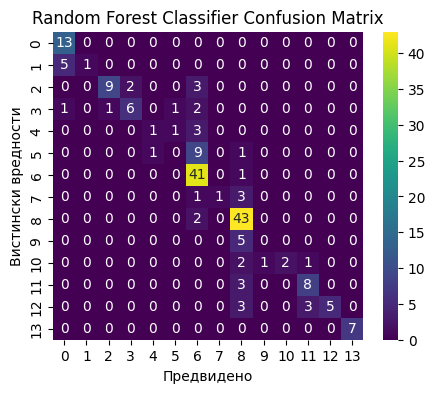

---------------------------------------------------------------------- 



In [74]:
X = df[['Q8','Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59']]
y = df['Q8']

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X_train_struka, X_test, Y_train_struka, Y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


models = {
    "Support Vector Classifier": SVC(class_weight='balanced', random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest Classifier": RandomForestClassifier(class_weight='balanced', random_state=42),
}

results = []

for name, model in models.items():
    model.fit(X_train_struka, Y_train_struka)

    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred) * 100
    cm = confusion_matrix(Y_test, Y_pred)
    results.append({"Model": name, "Accuracy": round(accuracy, 4)})

    print(f"{name}'s accuracy: {round(accuracy, 4)}")
    print(classification_report(Y_test, Y_pred))

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, cmap="viridis")
    plt.xlabel("Предвидено")
    plt.ylabel("Вистински вредности")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    print("-" * 70, "\n")

In [75]:
evaluation_df = pd.DataFrame(results)
evaluation_df

Model  Accuracy
0  Support Vector Classifier   26.0417
1   Decision Tree Classifier  100.0000
2   Random Forest Classifier   71.3542

In [76]:
model_struka = RandomForestClassifier(class_weight='balanced',random_state=42)
model_struka.fit(X_train_struka,Y_train_struka)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [77]:
pred_struka = model_uni.predict(X_test)

In [78]:
pred_df = pd.DataFrame(pred_struka)
y_test = pd.DataFrame(Y_test)

In [79]:
print(classification_report(y_test, pred_df))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        42
           7       0.03      1.00      0.05         5
           8       0.00      0.00      0.00        45
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         7

    accuracy                           0.03       192
   macro avg       0.00      0.07      0.00       192
weighted avg       0.00      0.03      0.00       192



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


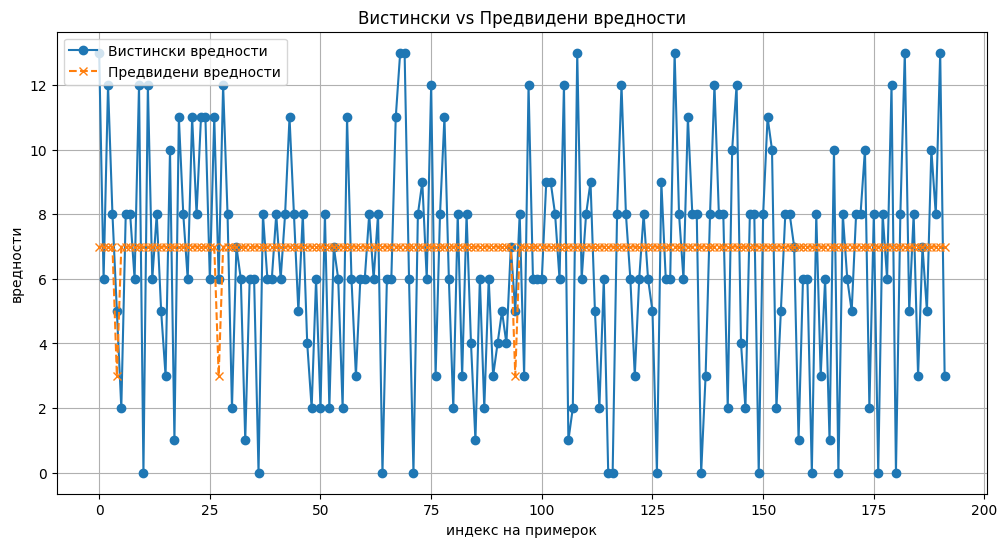

In [80]:
pred_df = pd.DataFrame(pred_struka, columns=['Predicted'])
y_test_df = pd.DataFrame(Y_test.values, columns=['Actual'])

plot_df = pd.concat([y_test_df.reset_index(drop=True), pred_df.reset_index(drop=True)], axis=1)

plt.figure(figsize=(12, 6))
plt.plot(plot_df.index, plot_df['Actual'], label='Вистински вредности', linestyle='-', marker='o')
plt.plot(plot_df.index, plot_df['Predicted'], label='Предвидени вредности', linestyle='--', marker='x')
plt.xlabel('индекс на примерок')
plt.ylabel('вредности')
plt.title('Вистински vs Предвидени вредности')
plt.legend()
plt.grid(True)
plt.show()